In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy import optimize

# import sys
# path = "/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/stuff"
# sys.path.append(path)
# import detect_peaks
import pandas as pd
%config InlineBackend.figure_format = 'retina'
plt.style.use('dark_background')

In [19]:
PARAMS = {'title_font_size' : 20,
          'grid_linewidth': 1.5,
          'grid_linestyle': ':',
          'ticks_lenght': 3,
          'ticks_width': 1,
          'grid_alpha': 0.4,
          'labels_font_size': 20,
          'saveDir': './images'
         }
class plotting:
    def __init__(self, parameters):
        self.__dict__.update(parameters)
        self.plot_name = 'ein_plot'
        
    def plot(self, xData, yData, xLabel,yLabel, xUnits=None, yUnits=None, title=None, line='o'):
        self.plot_name = title
        fig = plt.figure(figsize=(10,5))
        plt.plot(xData, yData, line, clip_on = False)
        plt.grid(linestyle=self.grid_linestyle, linewidth = self.grid_linewidth)
        if title:
            plt.title(title, fontsize=self.title_font_size)
        if xUnits:
            plt.xlabel(f'{xLabel} ({xUnits})', fontsize=self.labels_font_size)
        else:
            plt.xlabel(f'{xLabel}', fontsize=self.labels_font_size)
        if yUnits:
            plt.ylabel(f'{yLabel} ({yUnits})', fontsize=self.labels_font_size)
        else:
            plt.ylabel(f'{yLabel}', fontsize=self.labels_font_size)
#         plt.legend()
        plt.xticks()
        plt.tick_params(direction='in', length=self.ticks_lenght, width=self.ticks_width,
                           grid_color='y', grid_alpha=self.grid_alpha )
    def save(self, dirToSave=None):
        if dirToSave:
            self.saveDir = dirToSave 
        if not os.path.isdir(self.saveDir):
            os.mkdir(self.saveDir)
        if not os.path.isfile(f'{self.plot_name}_0.pdf'):
            plt.savefig(f'{self.saveDir}/{self.plot_name}_0.pdf')
        else:
            count = 0
            while (os.path.isfile(f'{self.plot_name}_{count}.pdf')):
                count += 1 
            plt.savefig(f"{self.saveDir}/{self.plot_name}_{count}.pdf")
        plt.show()
plot = plotting(PARAMS)

def toDot(filePath):
    tofile=[]
    with open(filePath, 'r') as file:
        for i in file.readlines():
#             print(i)
            i = i.replace(',','.')
            i = i.replace(';',' ')
#             print(i)
            tofile.append(i)
    with open(filePath, 'w') as file:
        for i in tofile:
            file.writelines(i)

def readCsv(filename):
    toDot(filename)
    data = []
    with open(filename, 'r') as ff:
        for i in ff.readlines()[1:]:
#             print(i)
            data.append(list(map(lambda x: float(x.rstrip()), i.split(' '))))
#         print(data)
    return np.array(data)[: , 0], np.array(data)[: , 1]

folderNMR = '/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/NMR_csvs/'
tables = os.listdir(folderNMR)

tables = list(filter(lambda x: x != '.DS_Store', tables))

tablesNums = [(i,int(list(filter(lambda x: x in '0123456789', i.split('-')[0]))[0]), 
  int(list(filter(lambda x: x in '0123456789', i.split('-')[1]))[0])) for i in tables]

ss = pd.DataFrame(tablesNums).sort_values(by=[1])
sortedTables = list(ss[0])
T1s = list(ss[ss[2] == 1][0])
T2s = list(ss[ss[2] == 2][0])

TYPE = np.dtype([('tau', np.dtype('<u4')), ('voltage', np.dtype('<u4'))])

# Plot all T1s at once

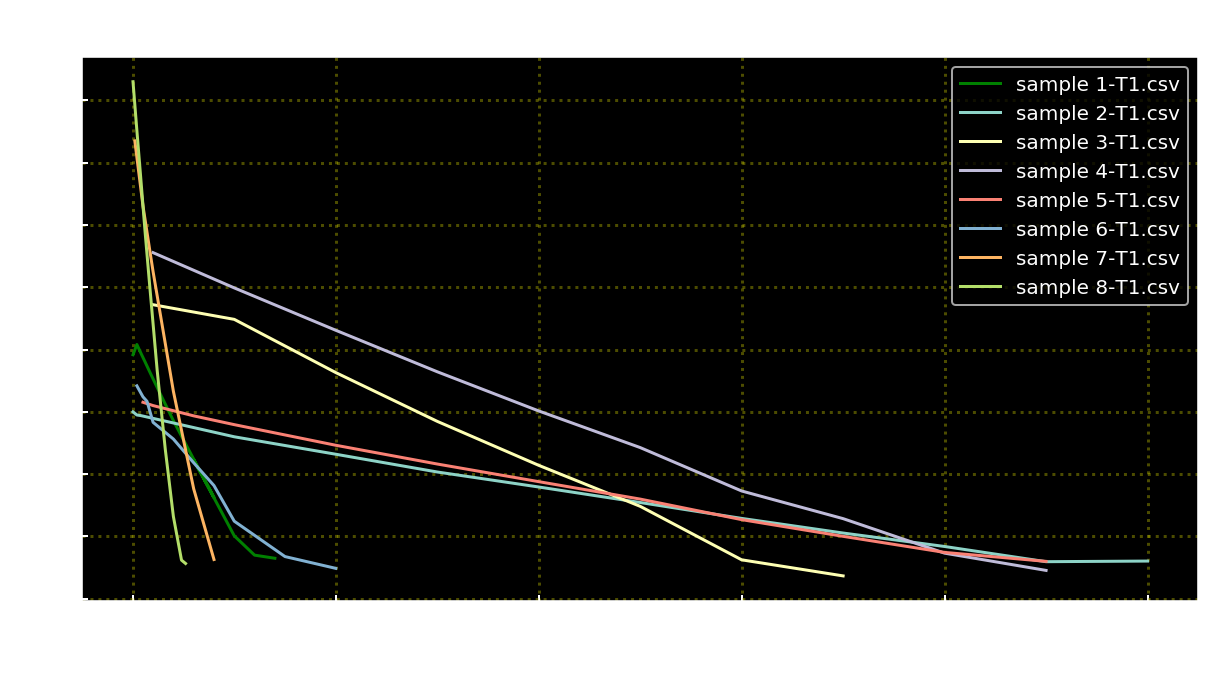

In [20]:
taus, volts = readCsv(folderNMR + T1s[0])
plot.plot(xData = taus, yData = volts, xLabel='time', 
          xUnits='sec', yLabel = 'Amplitude, V', 
          title=r'T$_1$', line = 'g-')
for i in [i for i in T1s[1:]]:
    toDot(folderNMR + i)
    taus, volts = readCsv(folderNMR + i)
    plt.plot(taus, volts, '-')
plt.legend([i for i in T1s])
plot.save('/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/images')

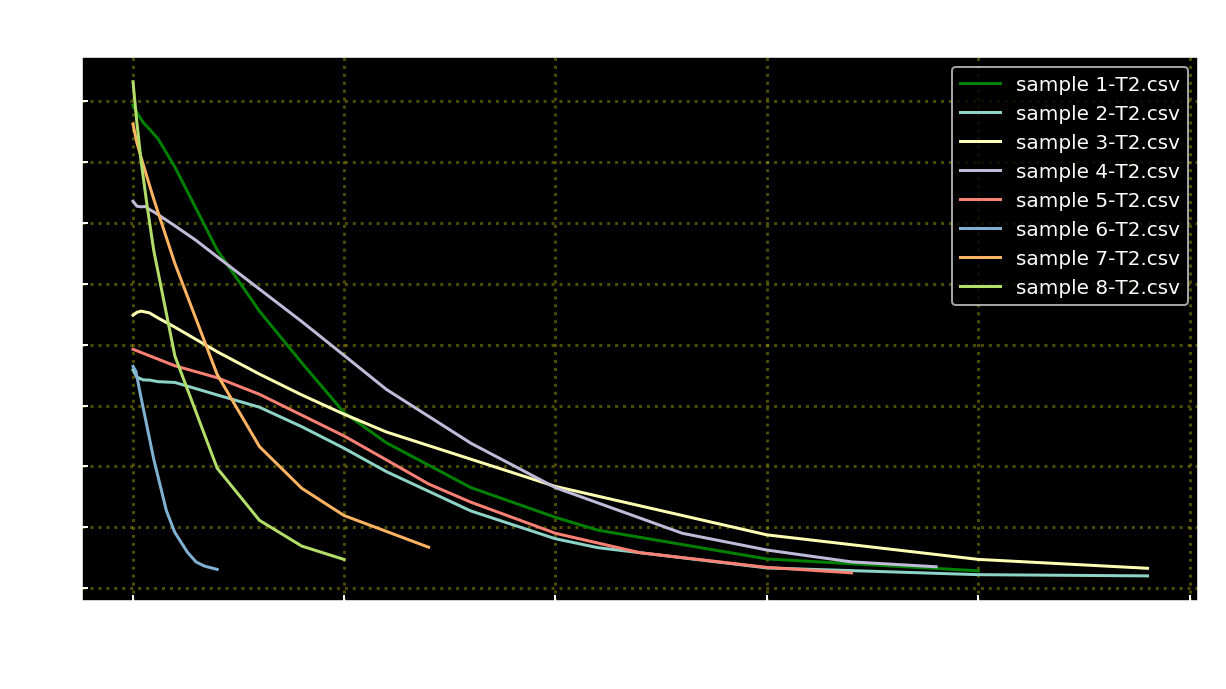

In [21]:
taus, volts = readCsv(folderNMR + T2s[0])
plot.plot(xData = taus, yData = volts, xLabel='time', 
          xUnits='sec', yLabel = 'Amplitude, V', 
          title=r'T$_2$', line = 'g-')
for i in [i for i in T2s[1:]]:
    toDot(folderNMR + i)
    taus, volts = readCsv(folderNMR + i)
    plt.plot(taus, volts, '-')
plt.legend([i for i in T2s])
plot.save('/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/images')

$$M(t)=M_{0} e^{-\frac{t}{T_{1}}}$$

$$M(t)=M_{0}\left(1-e^{-\frac{t}{T_{1}}}\right)$$

$$M_{x, y}(t)=M_{0} e^{-\frac{t}{T_{2}}}$$

# Plot T1s

In [22]:
def funcExp(t, *p):
    T=p[0]
    M0 = p[1]
#     A = p[2]
    return M0*np.exp(-2*t/T) #+ A

In [23]:
def funcAlomstExp(t, *p):
    T=p[0]
    M0 = p[1]
    A = p[2]
    return M0*np.exp(-t/T) + A

In [24]:
def plotExp(expcsv, pandaTable):
    toDot(folderNMR + expcsv)
    taus, volts = readCsv(folderNMR + expcsv)
    guess = [1, 1]
    bounds=([0,-1e8], [1e5, 1e8])
    froms = 1
    popt, pcov = optimize.curve_fit(funcExp, taus[froms:], 
                          volts[froms:], p0=guess, bounds=bounds)
    perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
    print ("OPTIMIZED PARAMETERS: cureveN[U0, Eg, C]", popt)
    t = np.linspace(0, taus[-1], 100)
    plot.plot(taus, volts, r'$\tau$',
              'Amplitude', 'sec', 'V', title=expcsv)
    plt.plot(t, funcExp(t, *popt))
    print(expcsv.split('-')[0][-1])
    pandaTable.loc[pandaTable.shape[0]] = [int(expcsv.split('-')[0][-1]), 
                   popt[0],perr[0], popt[1], perr[1]]#, popt[2], perr[2]] 
#     plt.annotate(f'M$_0$ = {round(1e3*popt[0], 2)} $\pm$ {1e3*round(perr[0],2)} ,\n\
#     T={round(popt[1], 4)} $\pm$ {round(perr[1],4)} sec',
#                xy=(0.65, 0.85),
#                xycoords='figure fraction', bbox=dict(boxstyle='square', fc='white', alpha=1))
    plt.legend(['data',f'T={round(popt[0], 4)} $\pm$ {round(perr[0],4)} sec ,\nM$_0$ = {round(popt[1], 2)} $\pm$ {round(perr[1],2)} V'])
    # plt.plot(taus, volts, '.')
    plt.tight_layout()

In [25]:
plt.style.use('default')

In [26]:
T1ss = pd.DataFrame(columns=['sample',r'T$_1$',r'T$_{error}$', r'M$_0$', r'M$_{error}$'])# r'M$_{ext}$', r'M$_{ext}^{error}$'])
T2ss = pd.DataFrame(columns=['sample',r'T$_2$',r'T$_{error}$', r'M$_0$', r'M$_{error}$'])# r'M$_{ext}$', r'M$_{ext}^{error}$'])

OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [0.07834353 4.48342819]
1


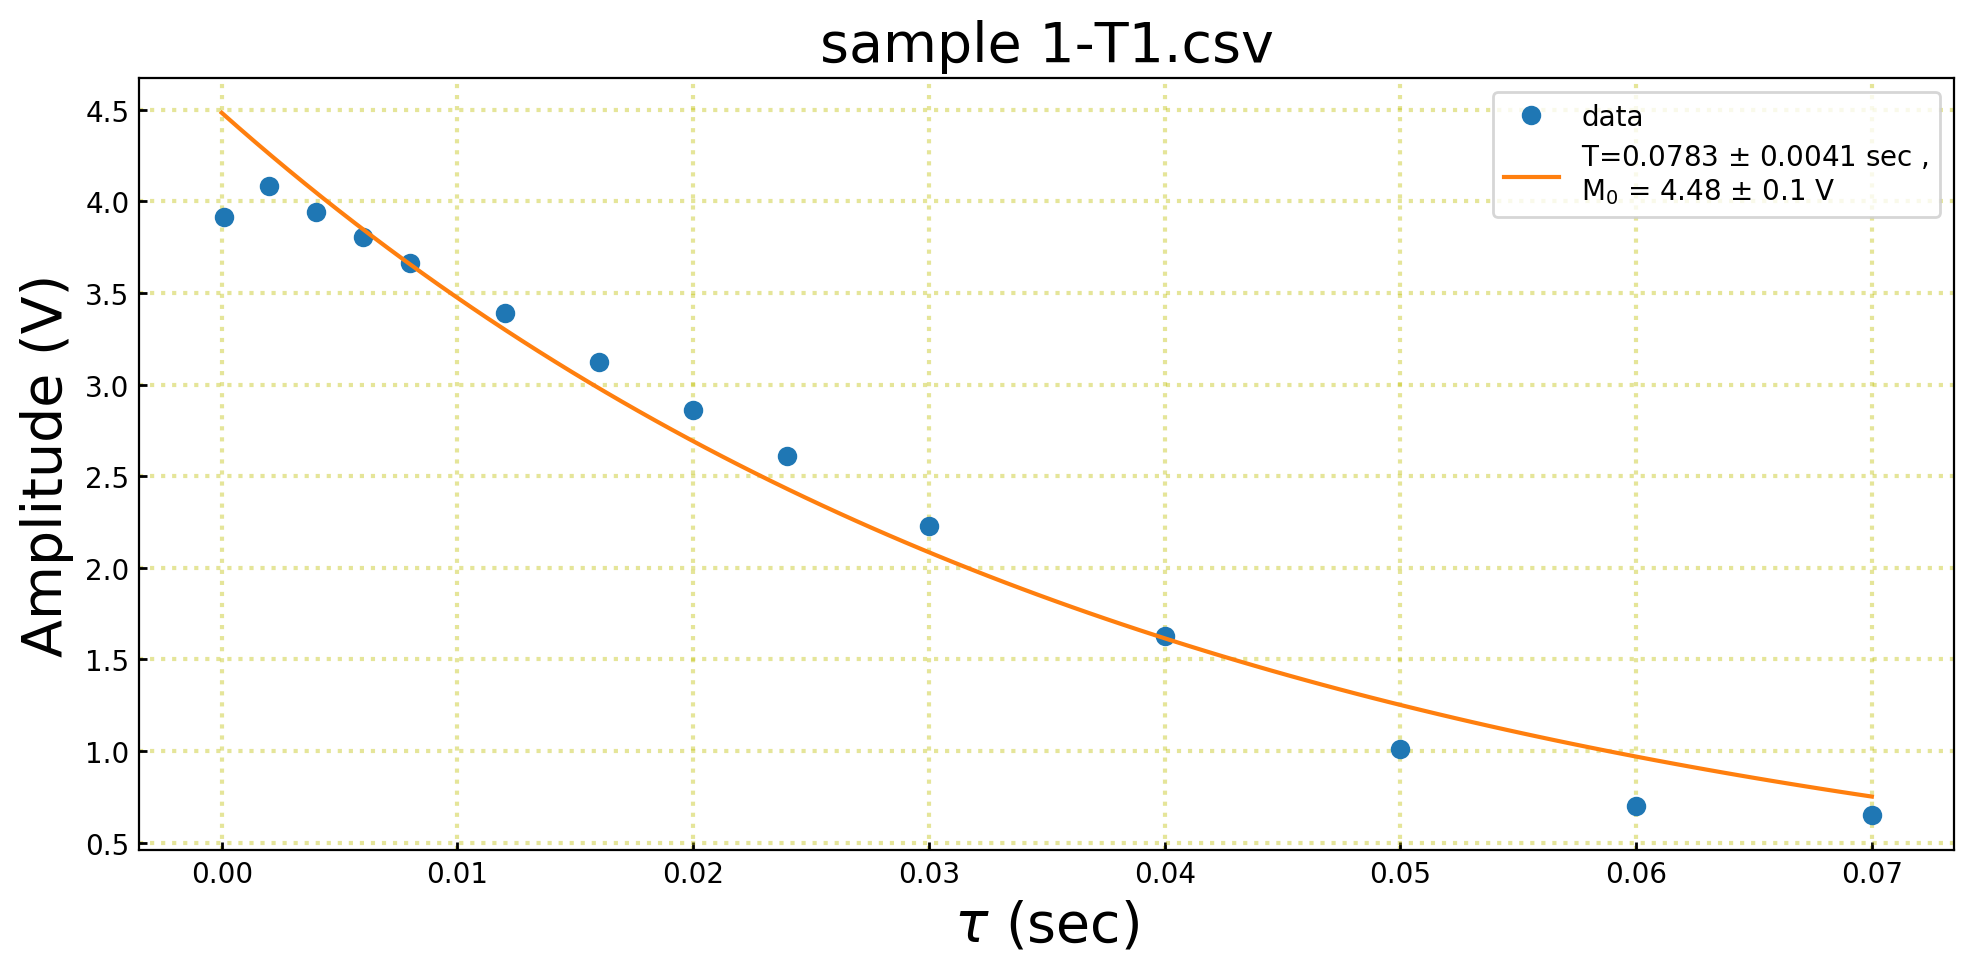

OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [0.67089417 3.03716335]
2


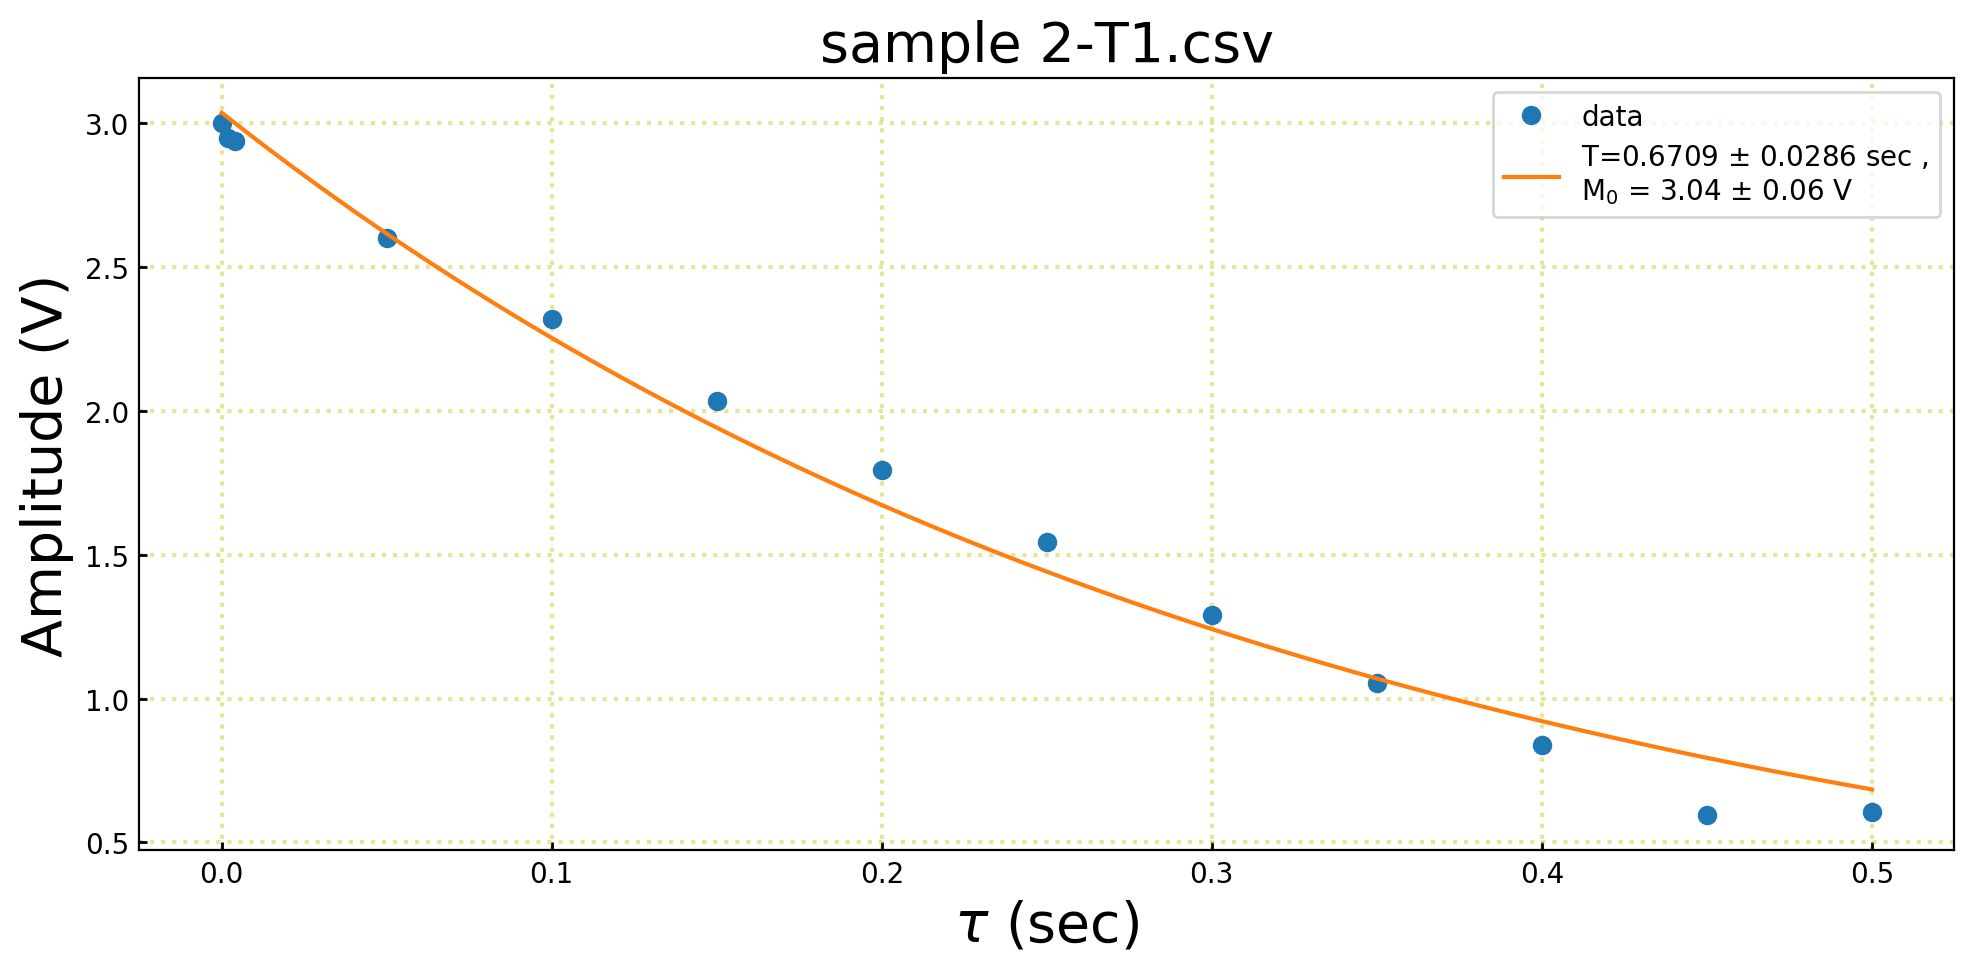

OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [0.32820859 6.40420943]
3


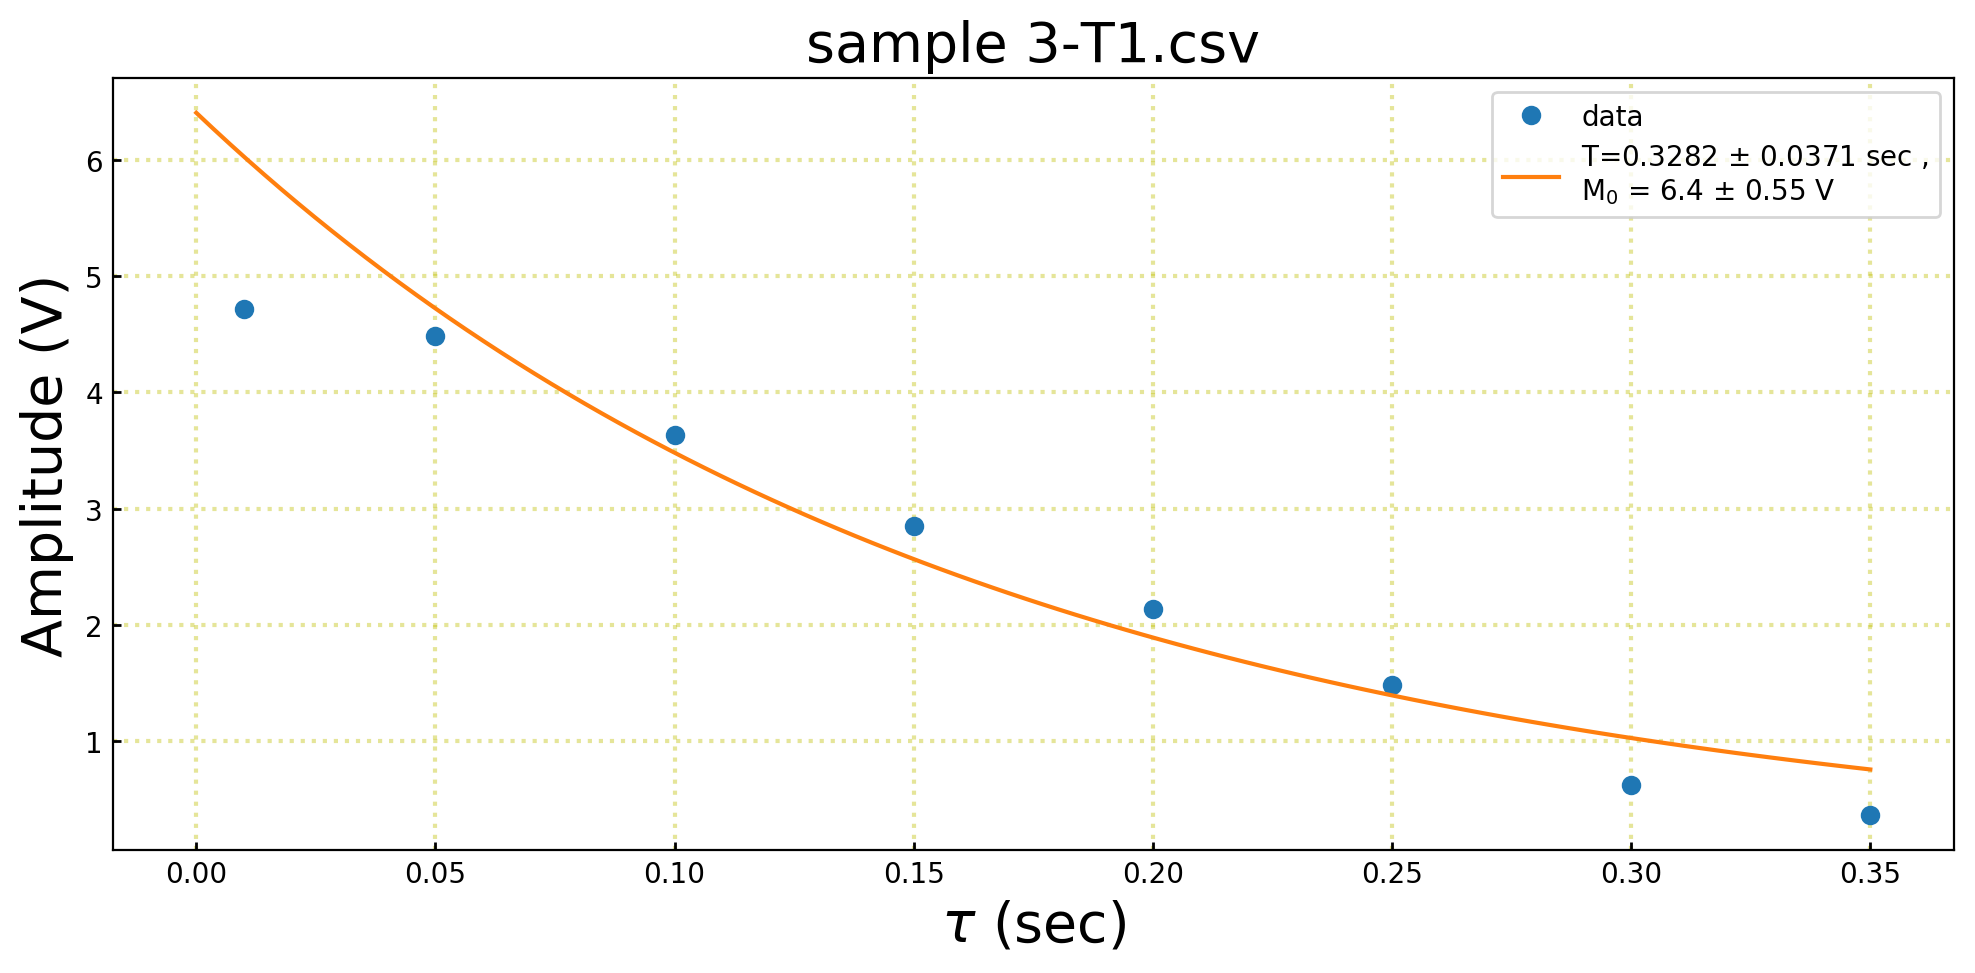

OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [0.44713215 6.62674282]
4


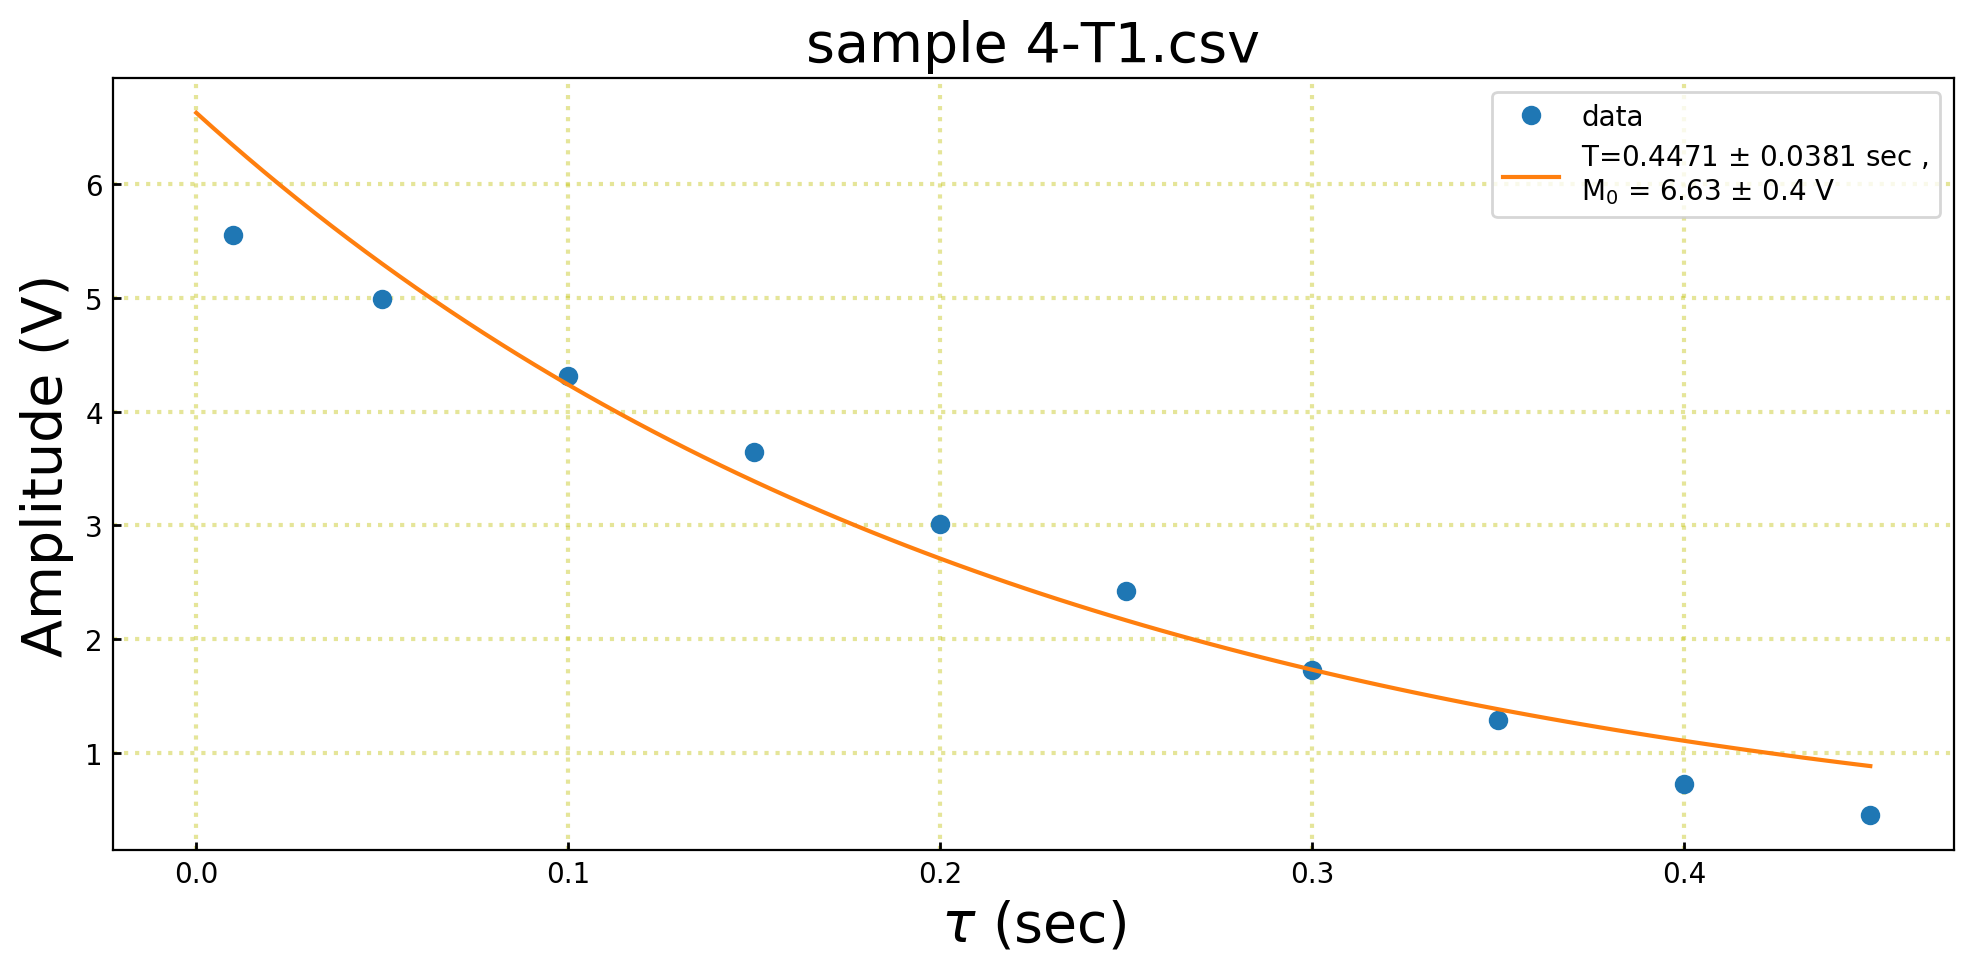

OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [0.62129478 3.300241  ]
5


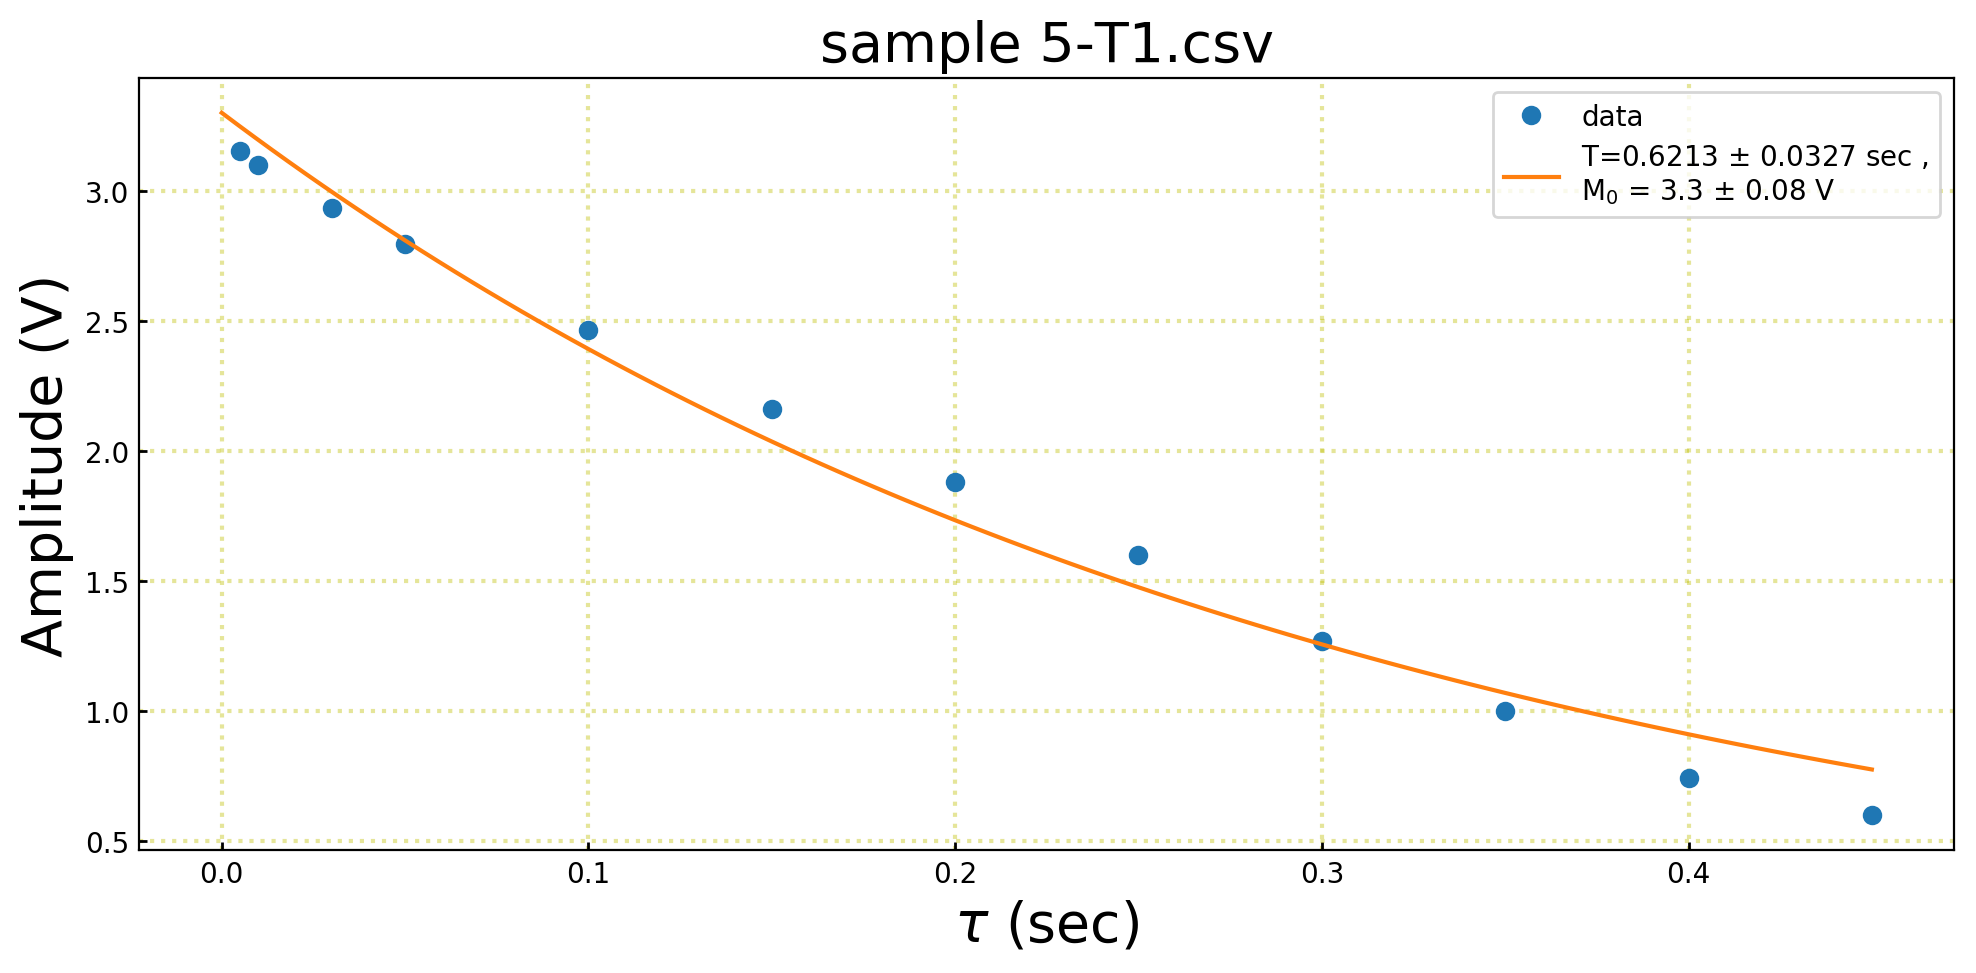

OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [0.1030632  3.61607855]
6


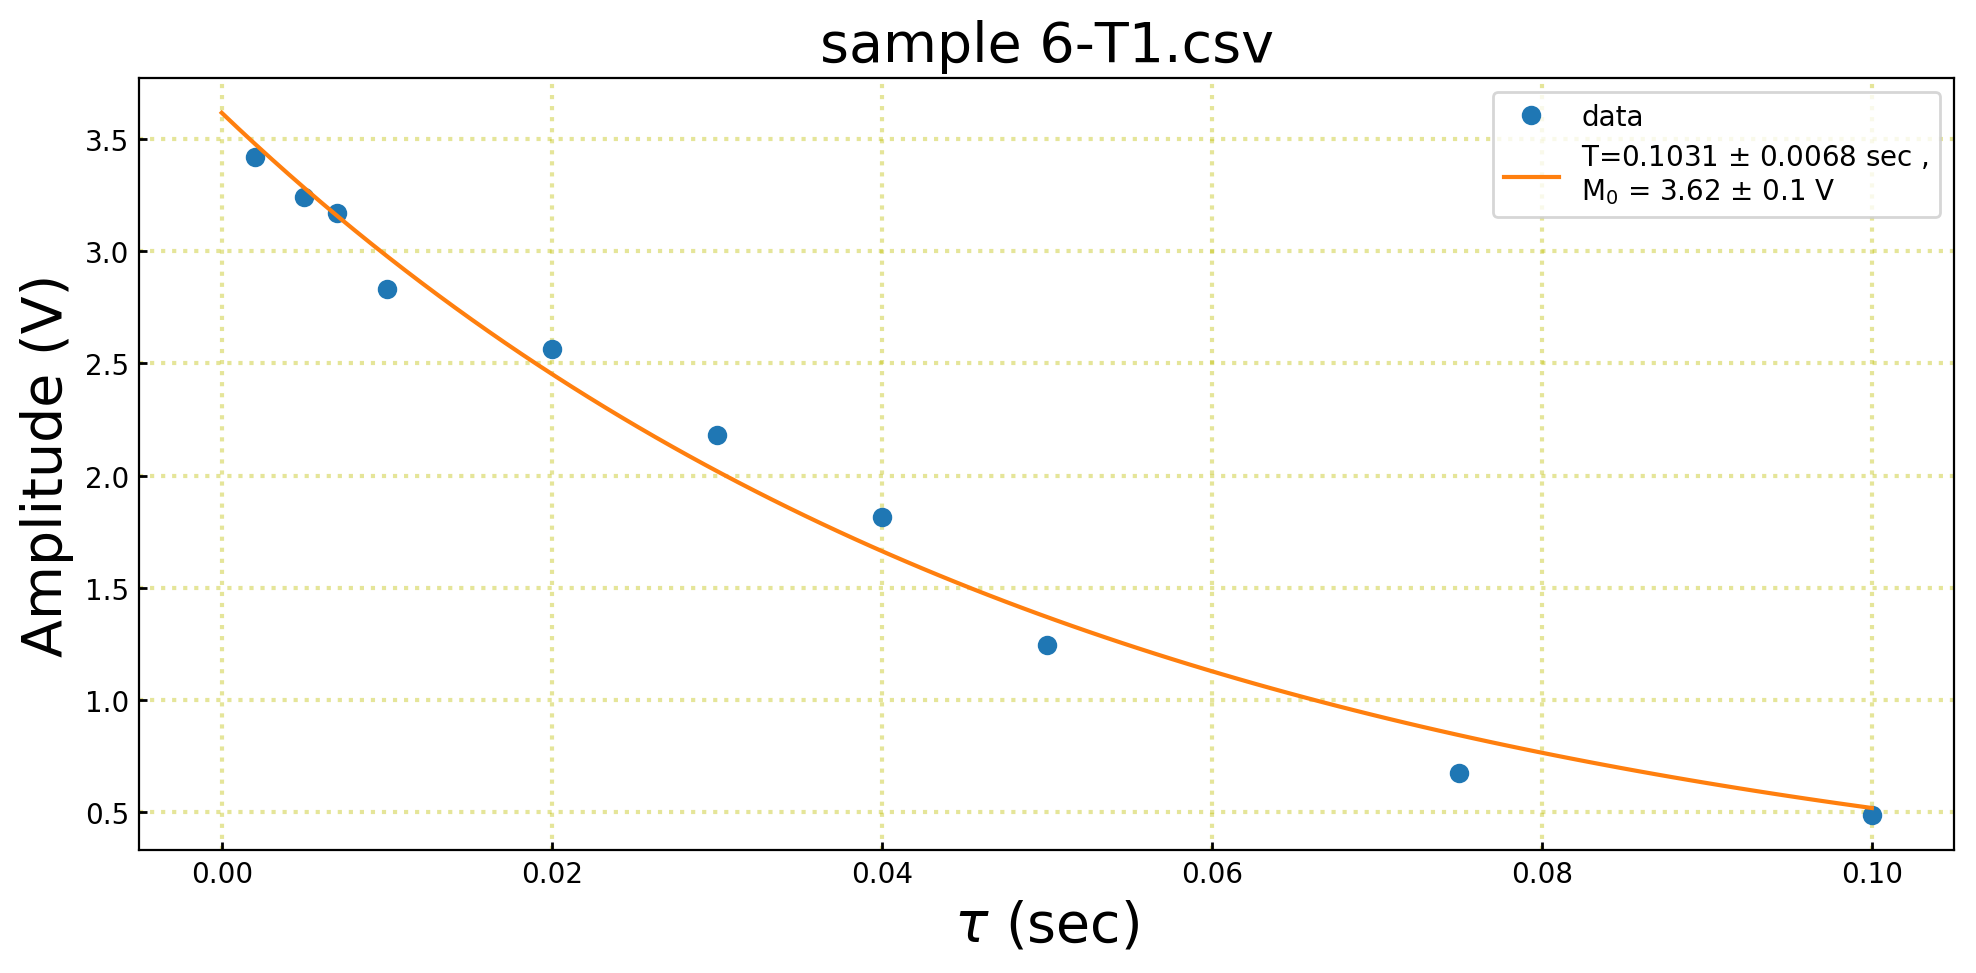

OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [0.0388956  8.47119715]
7


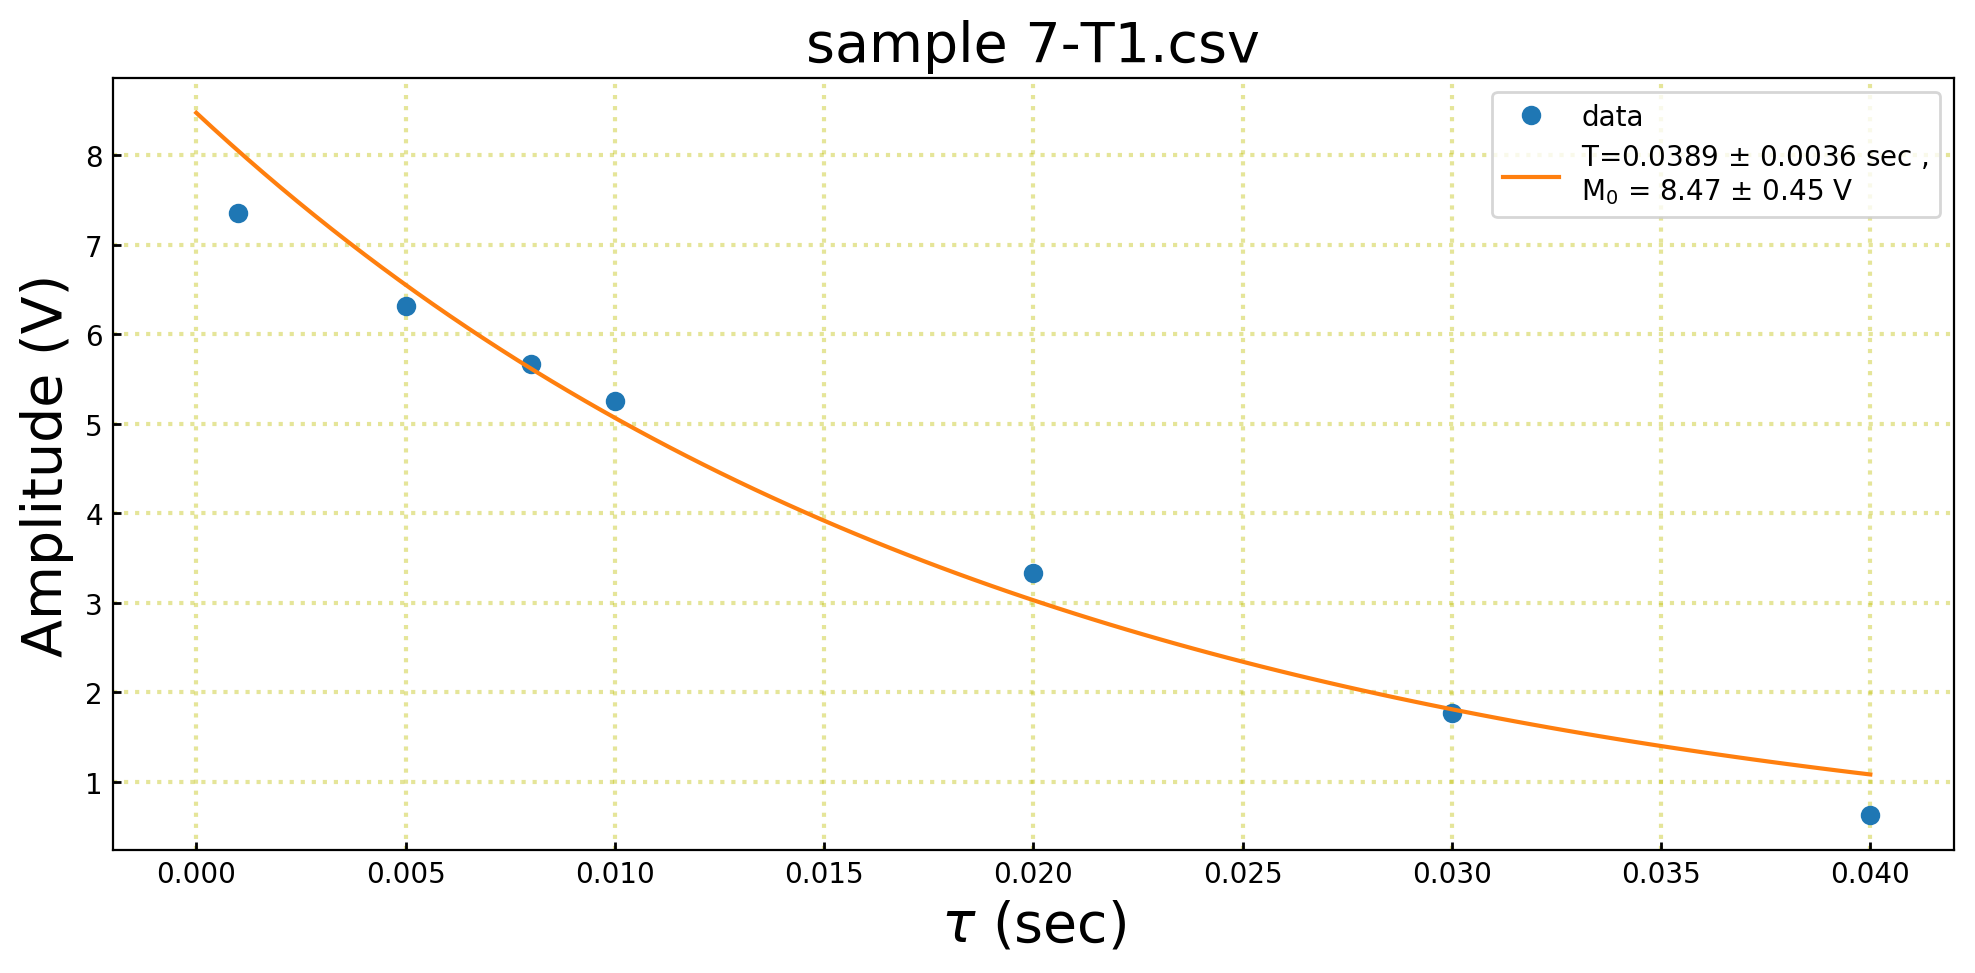

OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [0.02430565 8.99841937]
8


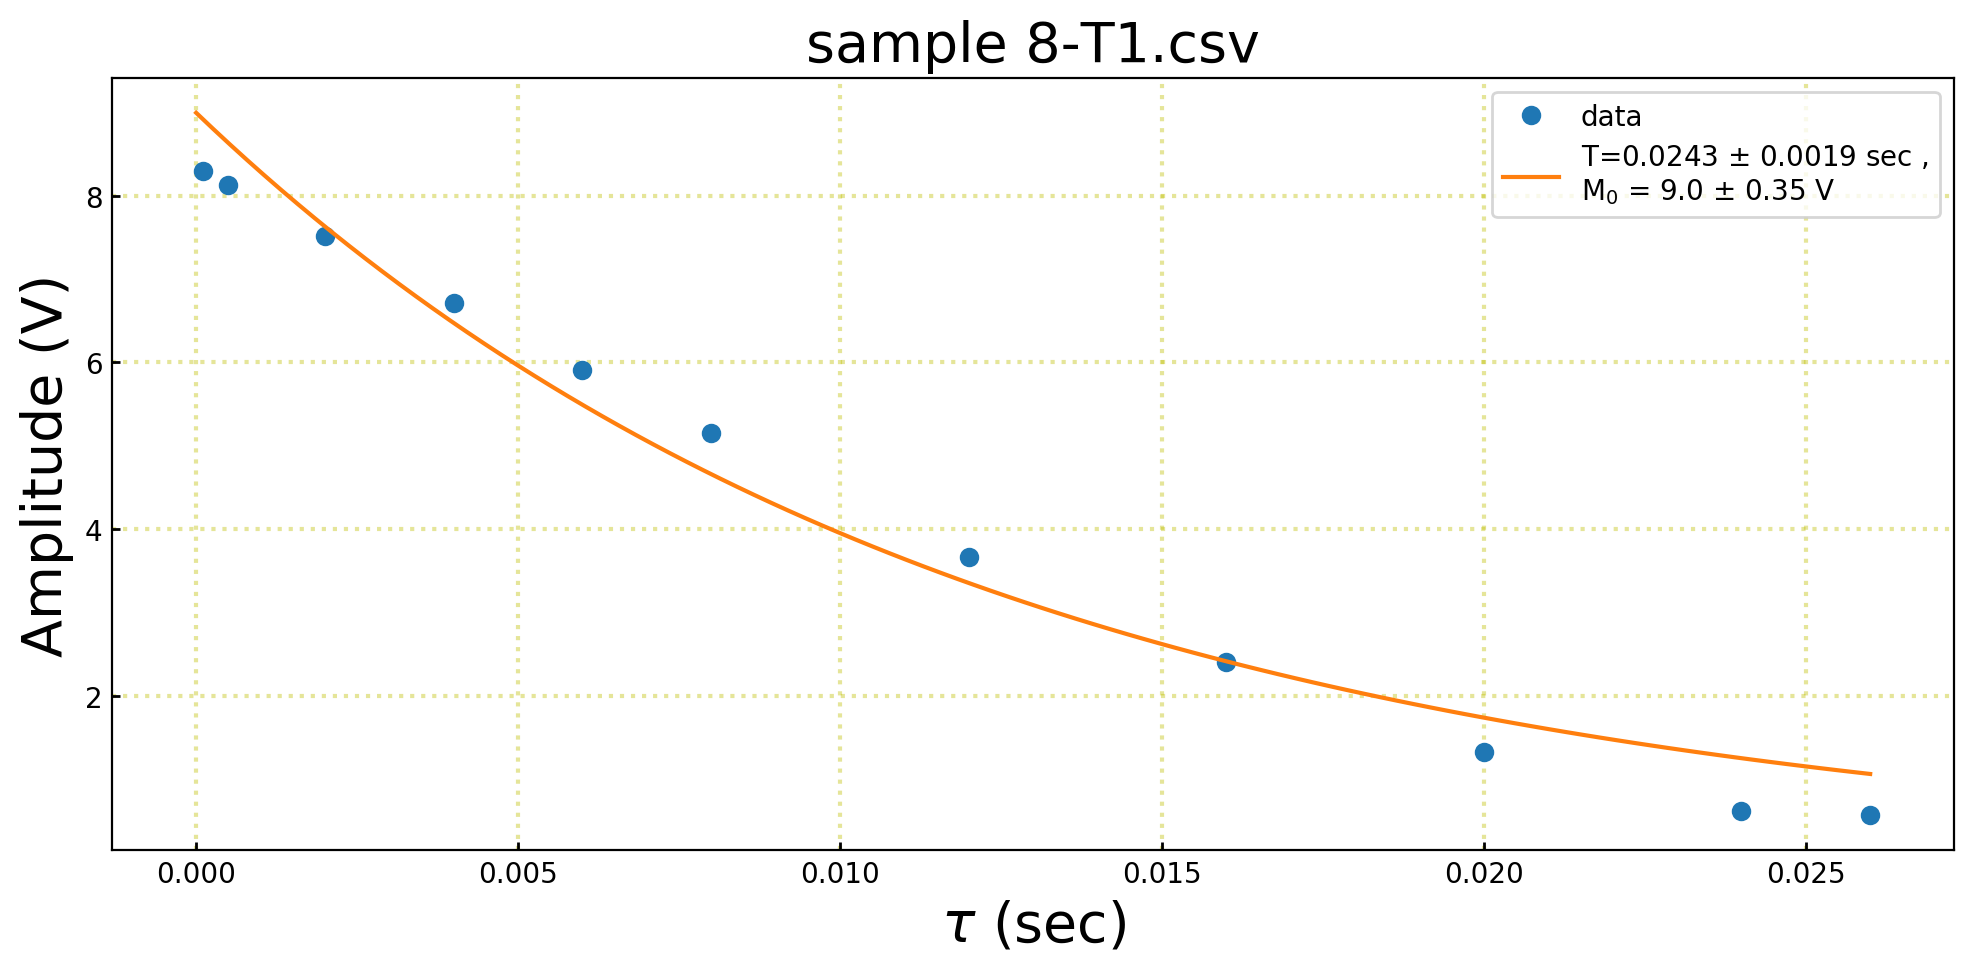

In [27]:
for i in T1s:
    plotExp(i, T1ss)
    plot.save(dirToSave='/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/images/T1ss_2')

### Make latex table

In [28]:
T1s_table = T1ss[:8]

In [29]:
T1s_table

,sample,T$_1$,T$_{error}$,M$_0$,M$_{error}$
0,1.0,0.078344,0.004142,4.483428,0.101981
1,2.0,0.670894,0.028605,3.037163,0.060218
2,3.0,0.328209,0.037102,6.404209,0.552725
3,4.0,0.447132,0.038098,6.626743,0.403791
4,5.0,0.621295,0.032719,3.300241,0.081085
5,6.0,0.103063,0.006755,3.616079,0.104830
6,7.0,0.038896,0.003568,8.471197,0.445861
7,8.0,0.024306,0.001878,8.998419,0.350639


In [30]:
# T1s_table = T1s_table.drop(1)
T1s_table = T1s_table.sort_values('sample')
T1s_table['sample'] = T1s_table['sample'].astype('int')
T1s_table

,sample,T$_1$,T$_{error}$,M$_0$,M$_{error}$
0,1,0.078344,0.004142,4.483428,0.101981
1,2,0.670894,0.028605,3.037163,0.060218
2,3,0.328209,0.037102,6.404209,0.552725
3,4,0.447132,0.038098,6.626743,0.403791
4,5,0.621295,0.032719,3.300241,0.081085
5,6,0.103063,0.006755,3.616079,0.104830
6,7,0.038896,0.003568,8.471197,0.445861
7,8,0.024306,0.001878,8.998419,0.350639


In [31]:
T1s_table[T1s_table.columns[1]] = np.round(T1s_table[T1s_table.columns[1]], 2)
T1s_table[T1s_table.columns[2]] = np.round(T1s_table[T1s_table.columns[2]], 3)
T1s_table[T1s_table.columns[3]] = np.round(T1s_table[T1s_table.columns[3]], 2)
T1s_table[T1s_table.columns[4]] = np.round(T1s_table[T1s_table.columns[4]], 2)
T1s_table

,sample,T$_1$,T$_{error}$,M$_0$,M$_{error}$
0,1,0.08,0.004,4.48,0.10
1,2,0.67,0.029,3.04,0.06
2,3,0.33,0.037,6.40,0.55
3,4,0.45,0.038,6.63,0.40
4,5,0.62,0.033,3.30,0.08
5,6,0.10,0.007,3.62,0.10
6,7,0.04,0.004,8.47,0.45
7,8,0.02,0.002,9.00,0.35


In [32]:
print(T1s_table.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  sample &  T\$\_1\$ &  T\$\_\{error\}\$ &  M\$\_0\$ &  M\$\_\{error\}\$ \\
\midrule
0 &       1 &   0.08 &        0.004 &   4.48 &         0.10 \\
1 &       2 &   0.67 &        0.029 &   3.04 &         0.06 \\
2 &       3 &   0.33 &        0.037 &   6.40 &         0.55 \\
3 &       4 &   0.45 &        0.038 &   6.63 &         0.40 \\
4 &       5 &   0.62 &        0.033 &   3.30 &         0.08 \\
5 &       6 &   0.10 &        0.007 &   3.62 &         0.10 \\
6 &       7 &   0.04 &        0.004 &   8.47 &         0.45 \\
7 &       8 &   0.02 &        0.002 &   9.00 &         0.35 \\
\bottomrule
\end{tabular}



# Now, T2s

OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [0.1012491  8.15789606]
1


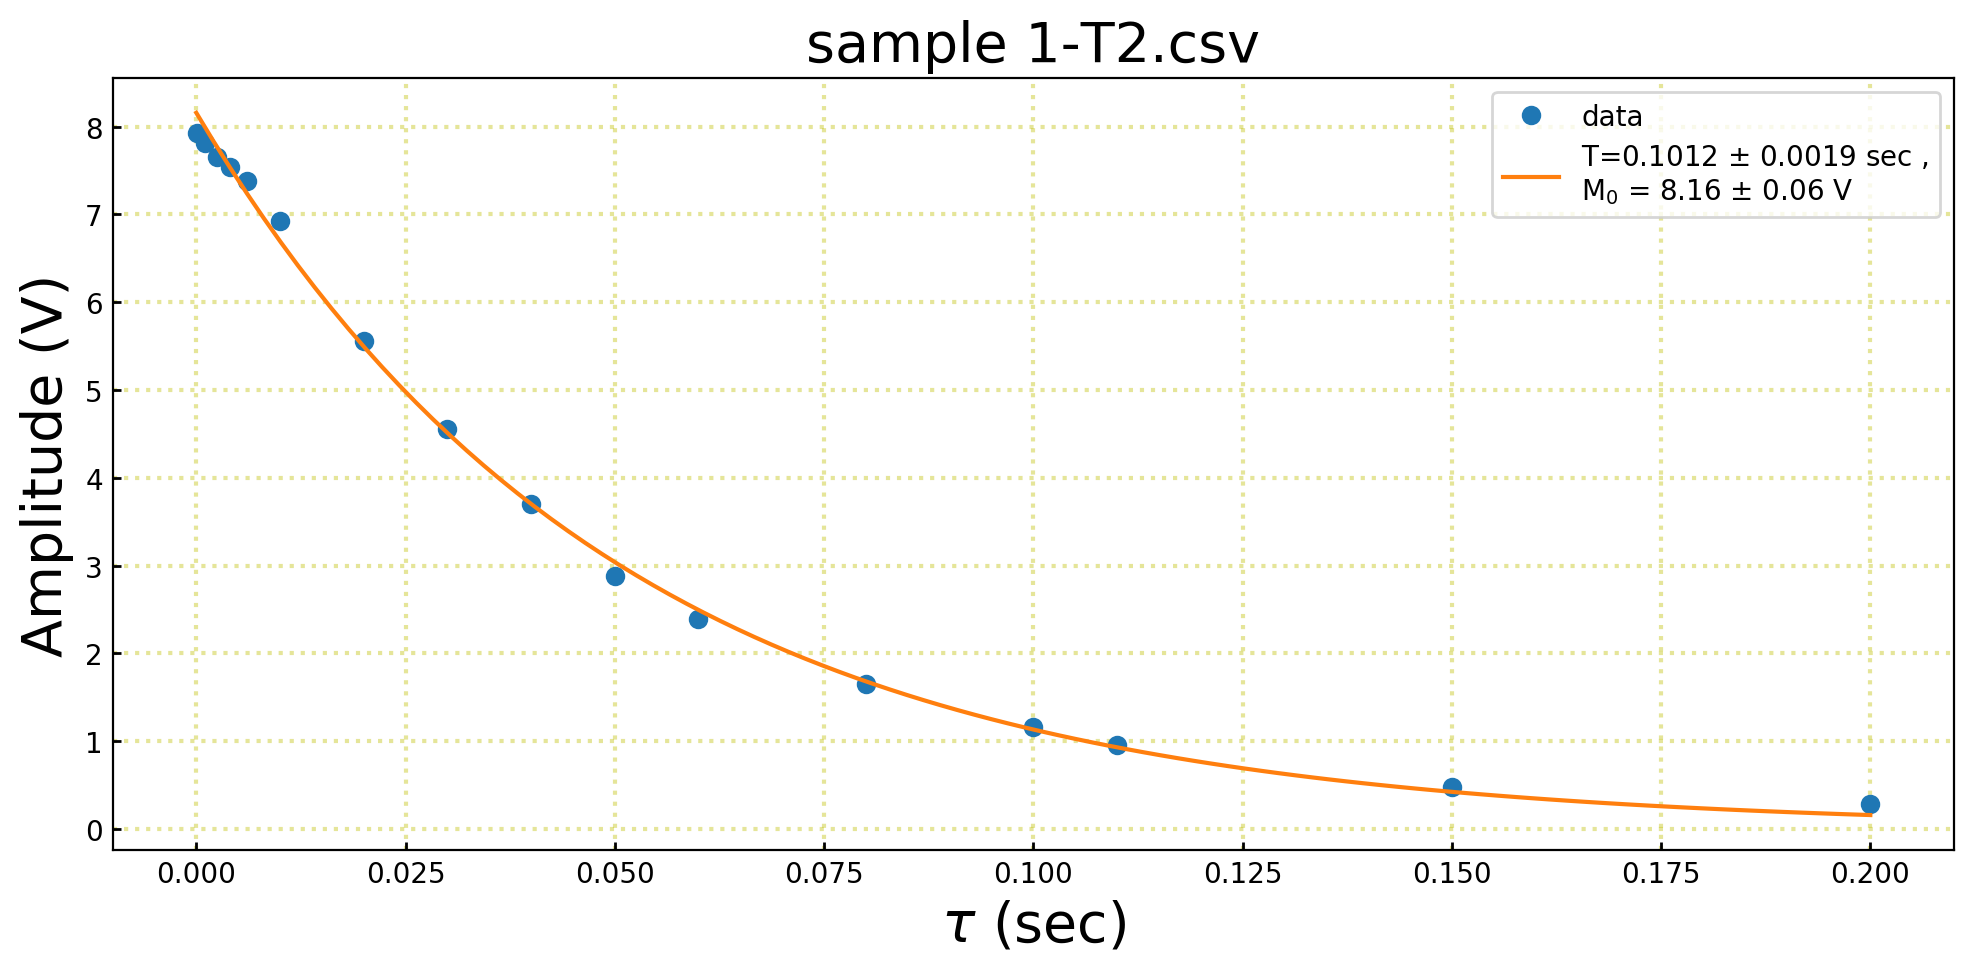

OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [0.16338125 3.74537337]
2


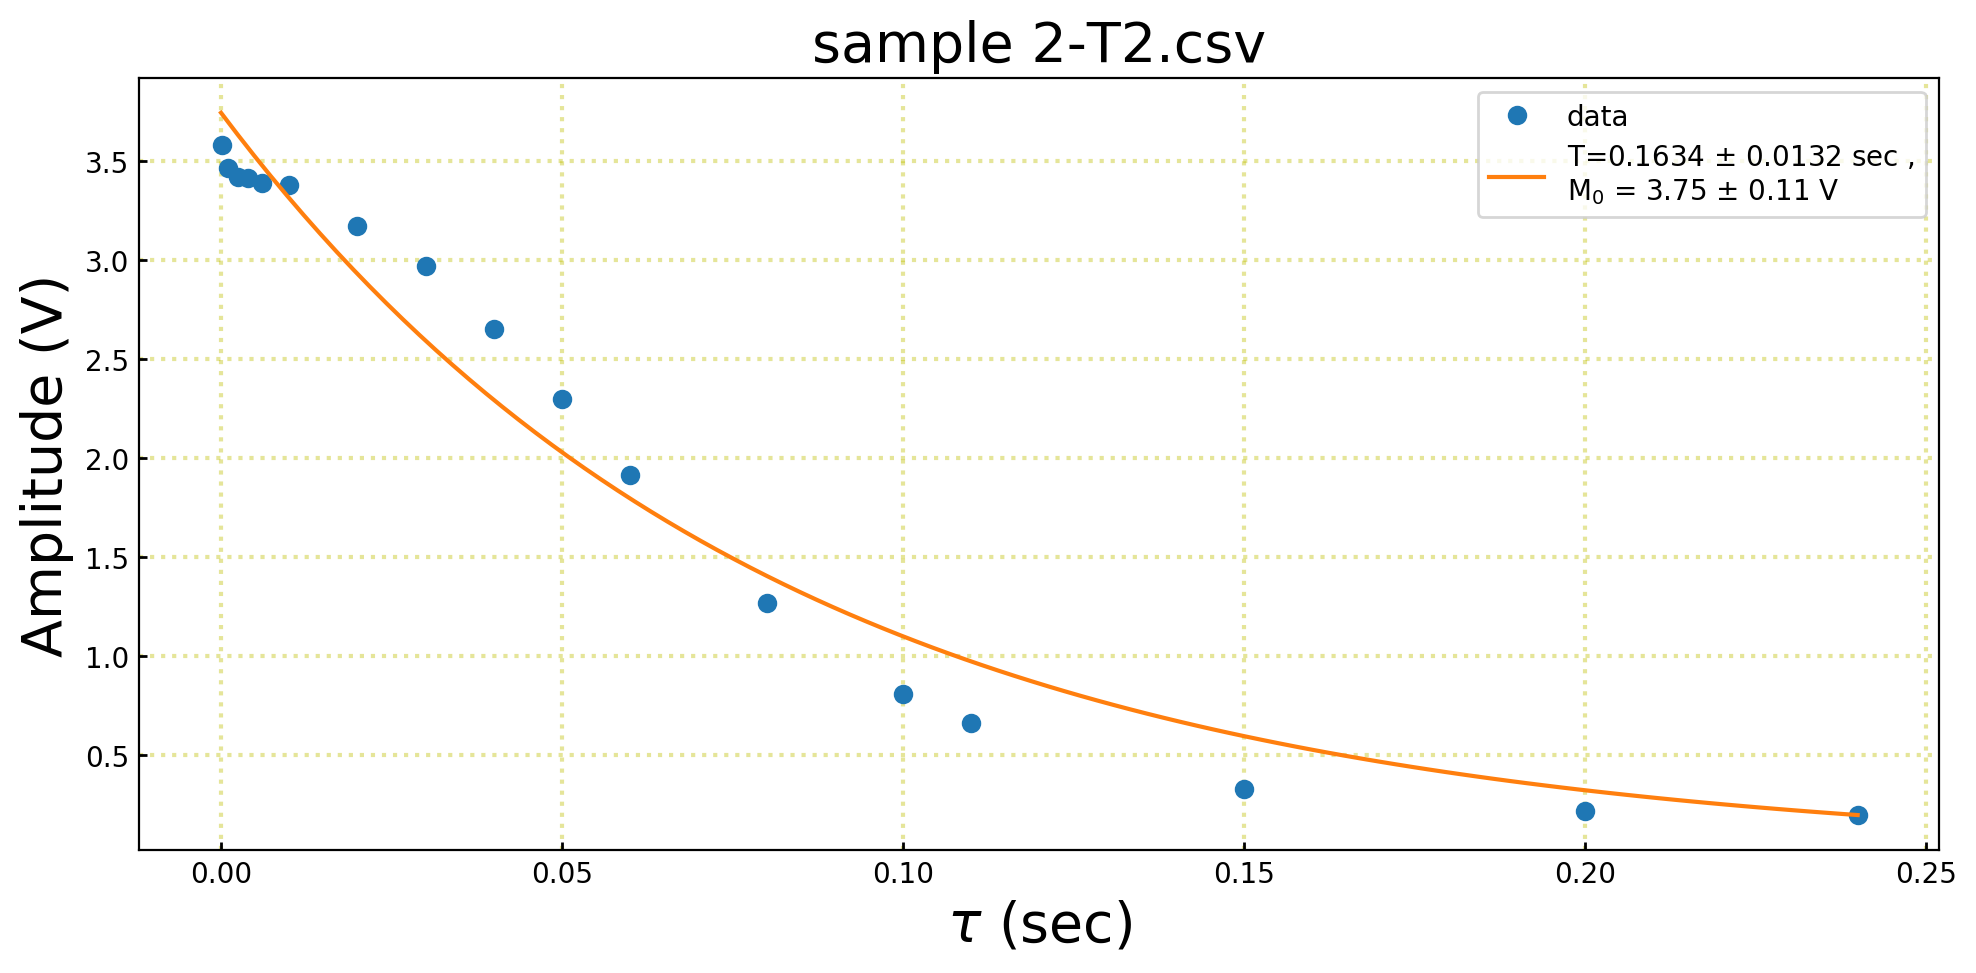

OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [0.19185786 4.71496443]
3


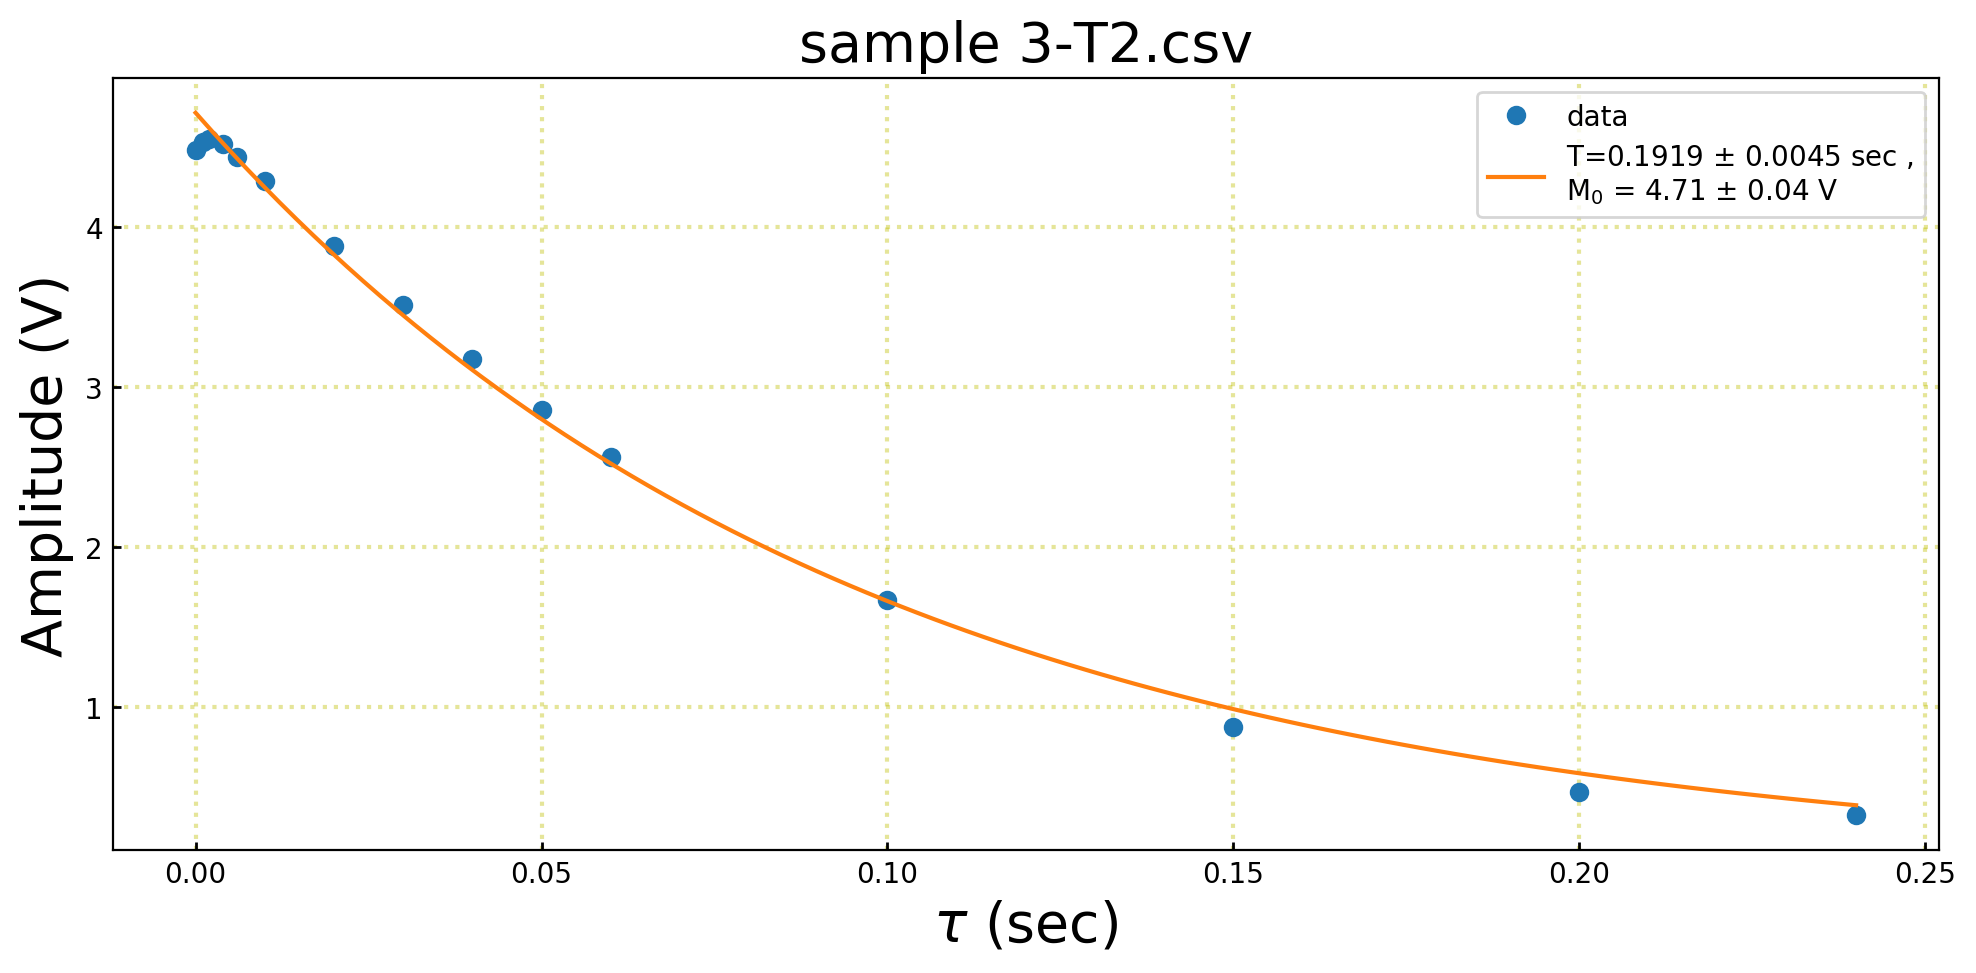

OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [0.15517193 6.65489958]
4


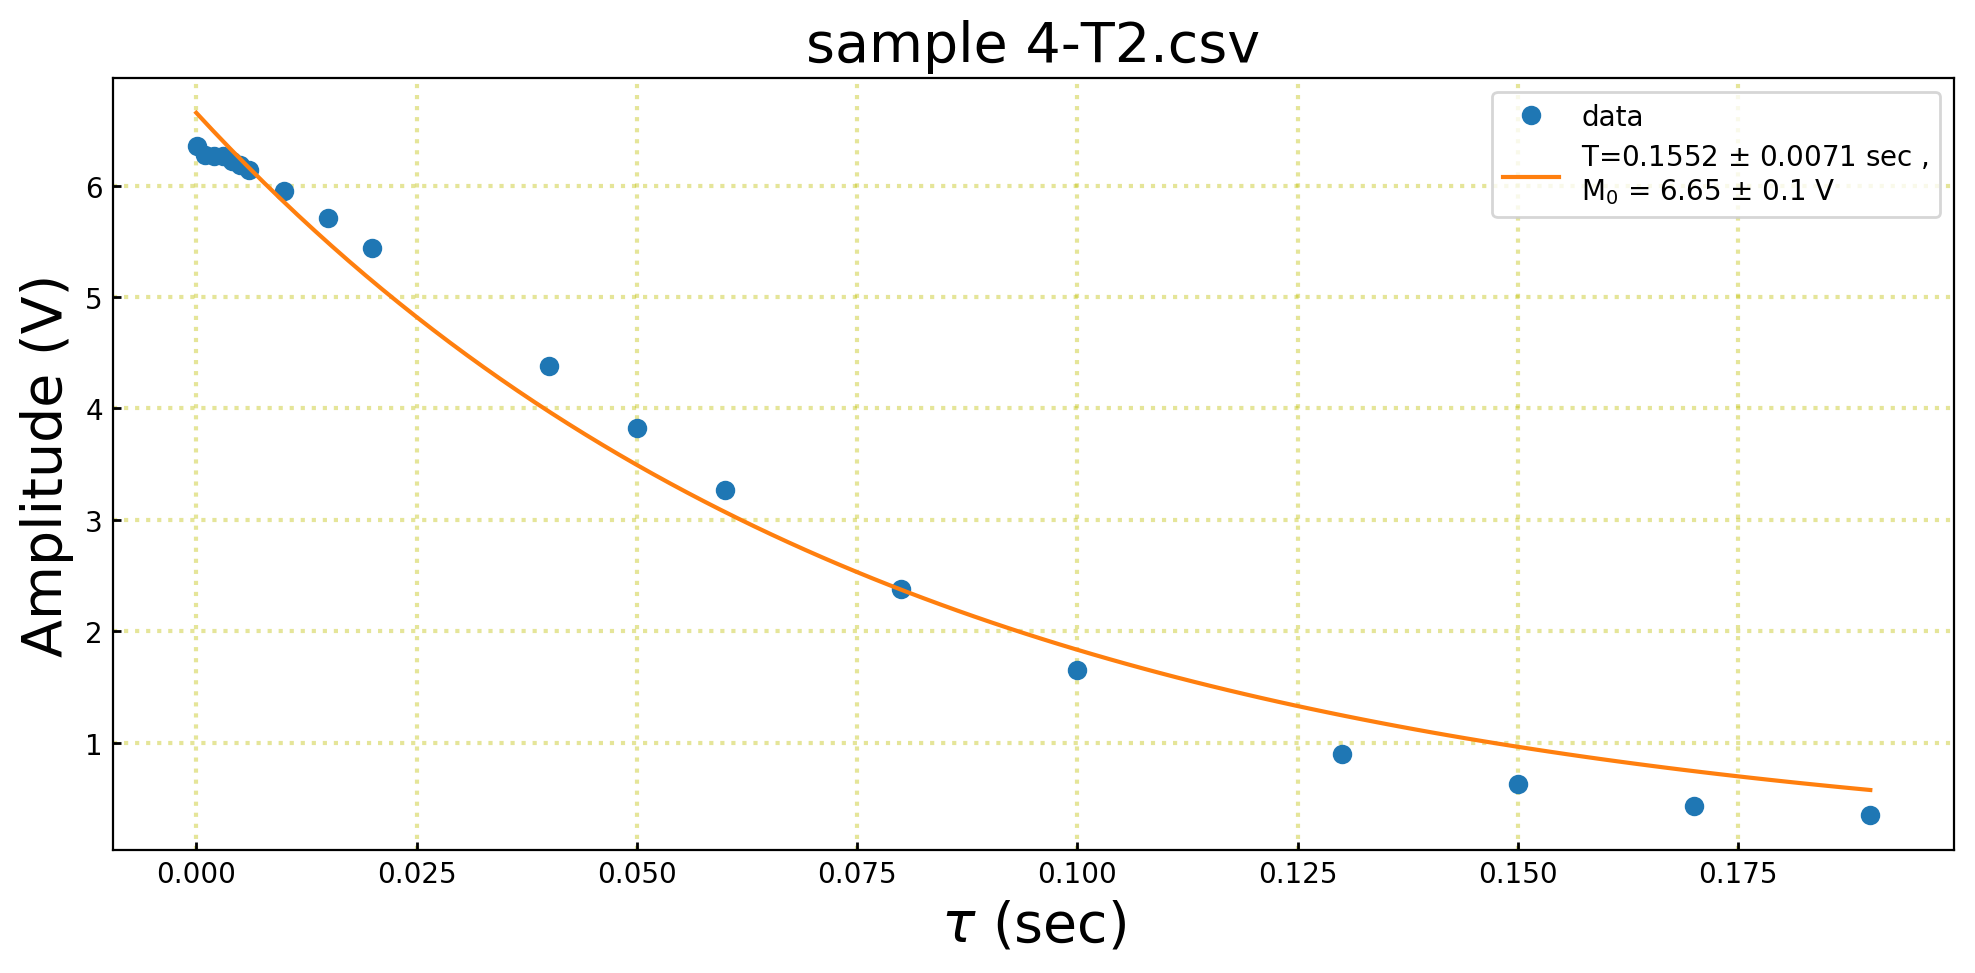

OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [0.13879557 4.62532364]
5


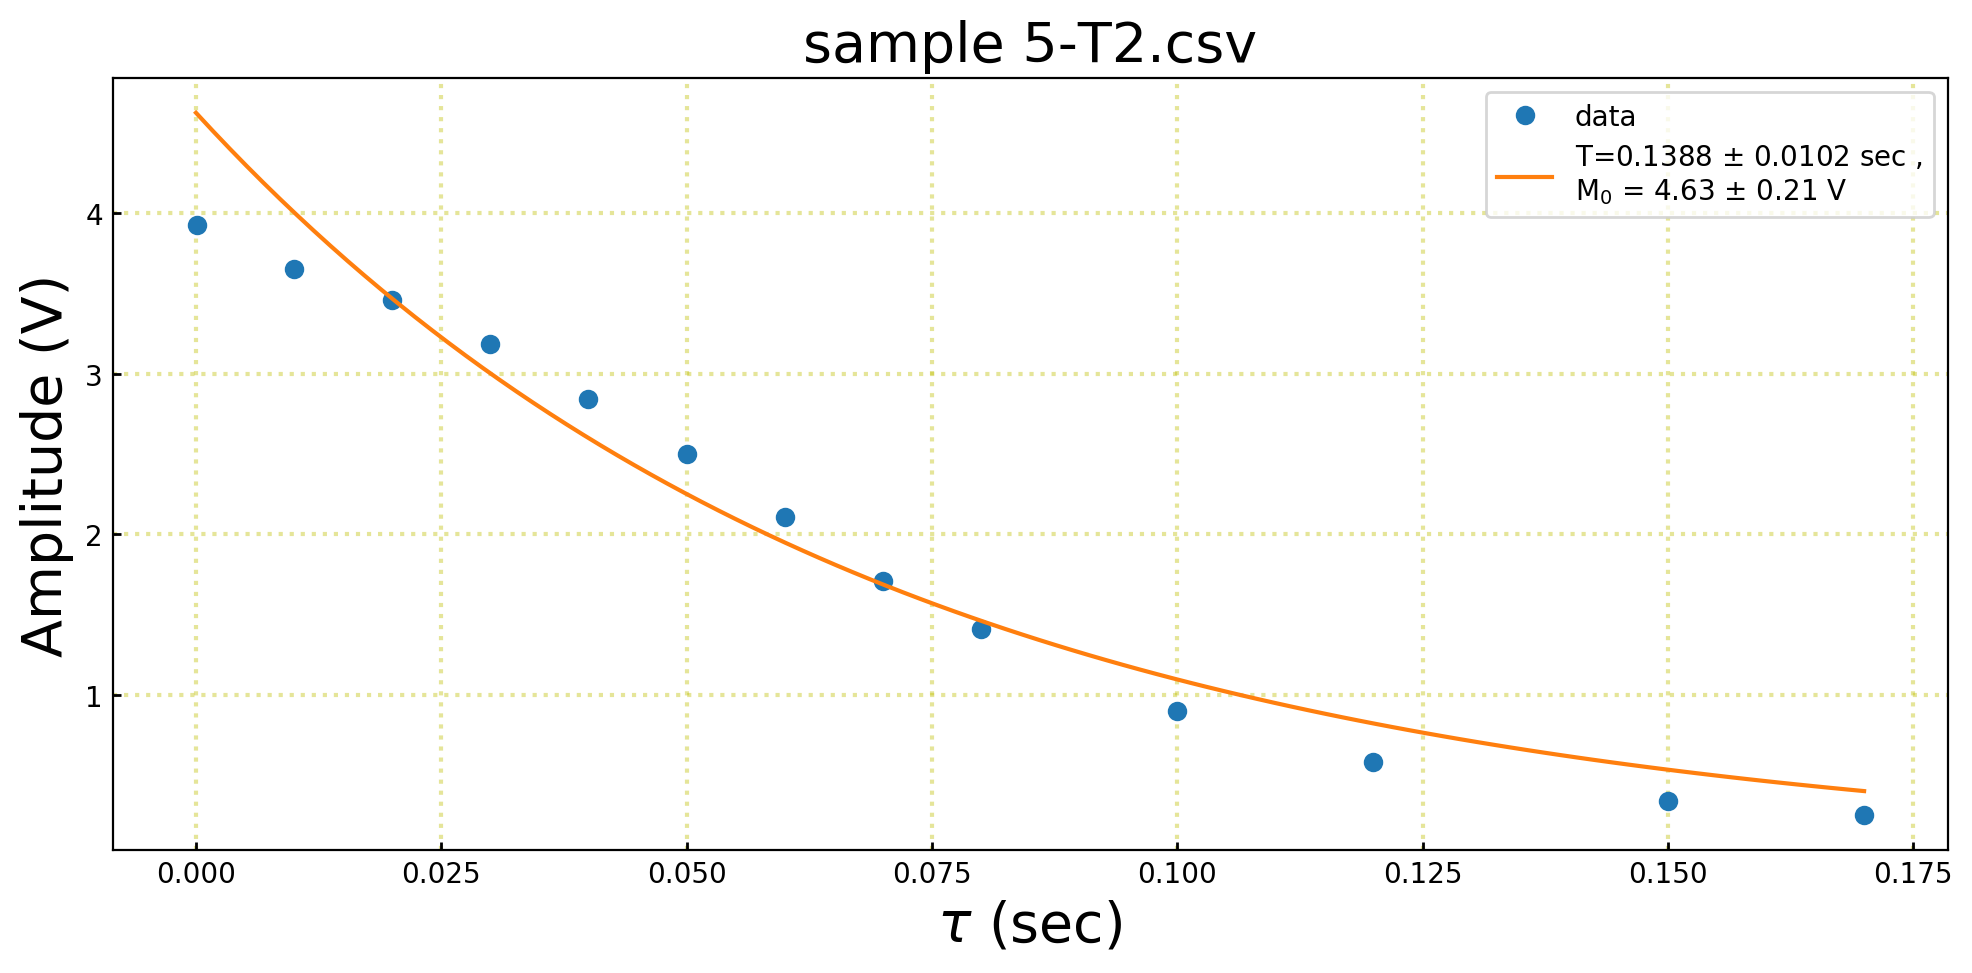

OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [0.01399582 4.0739787 ]
6


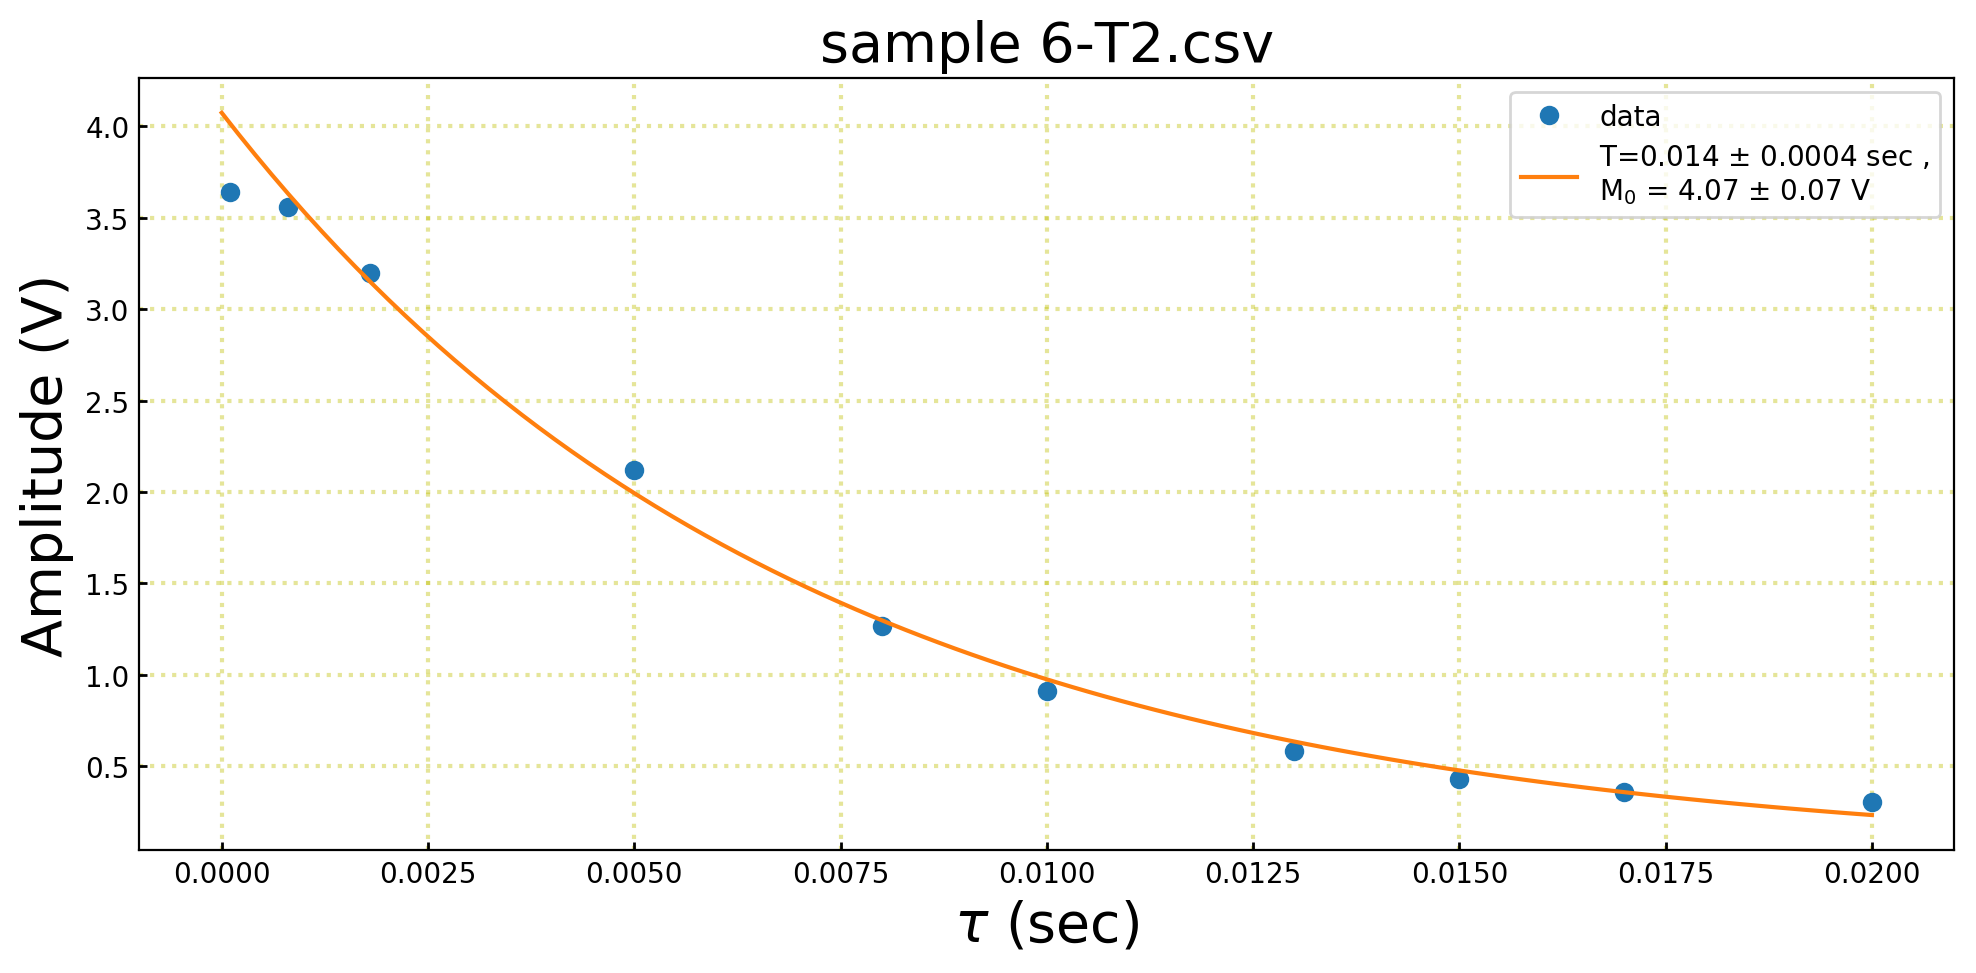

OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [0.05241687 7.66886787]
7


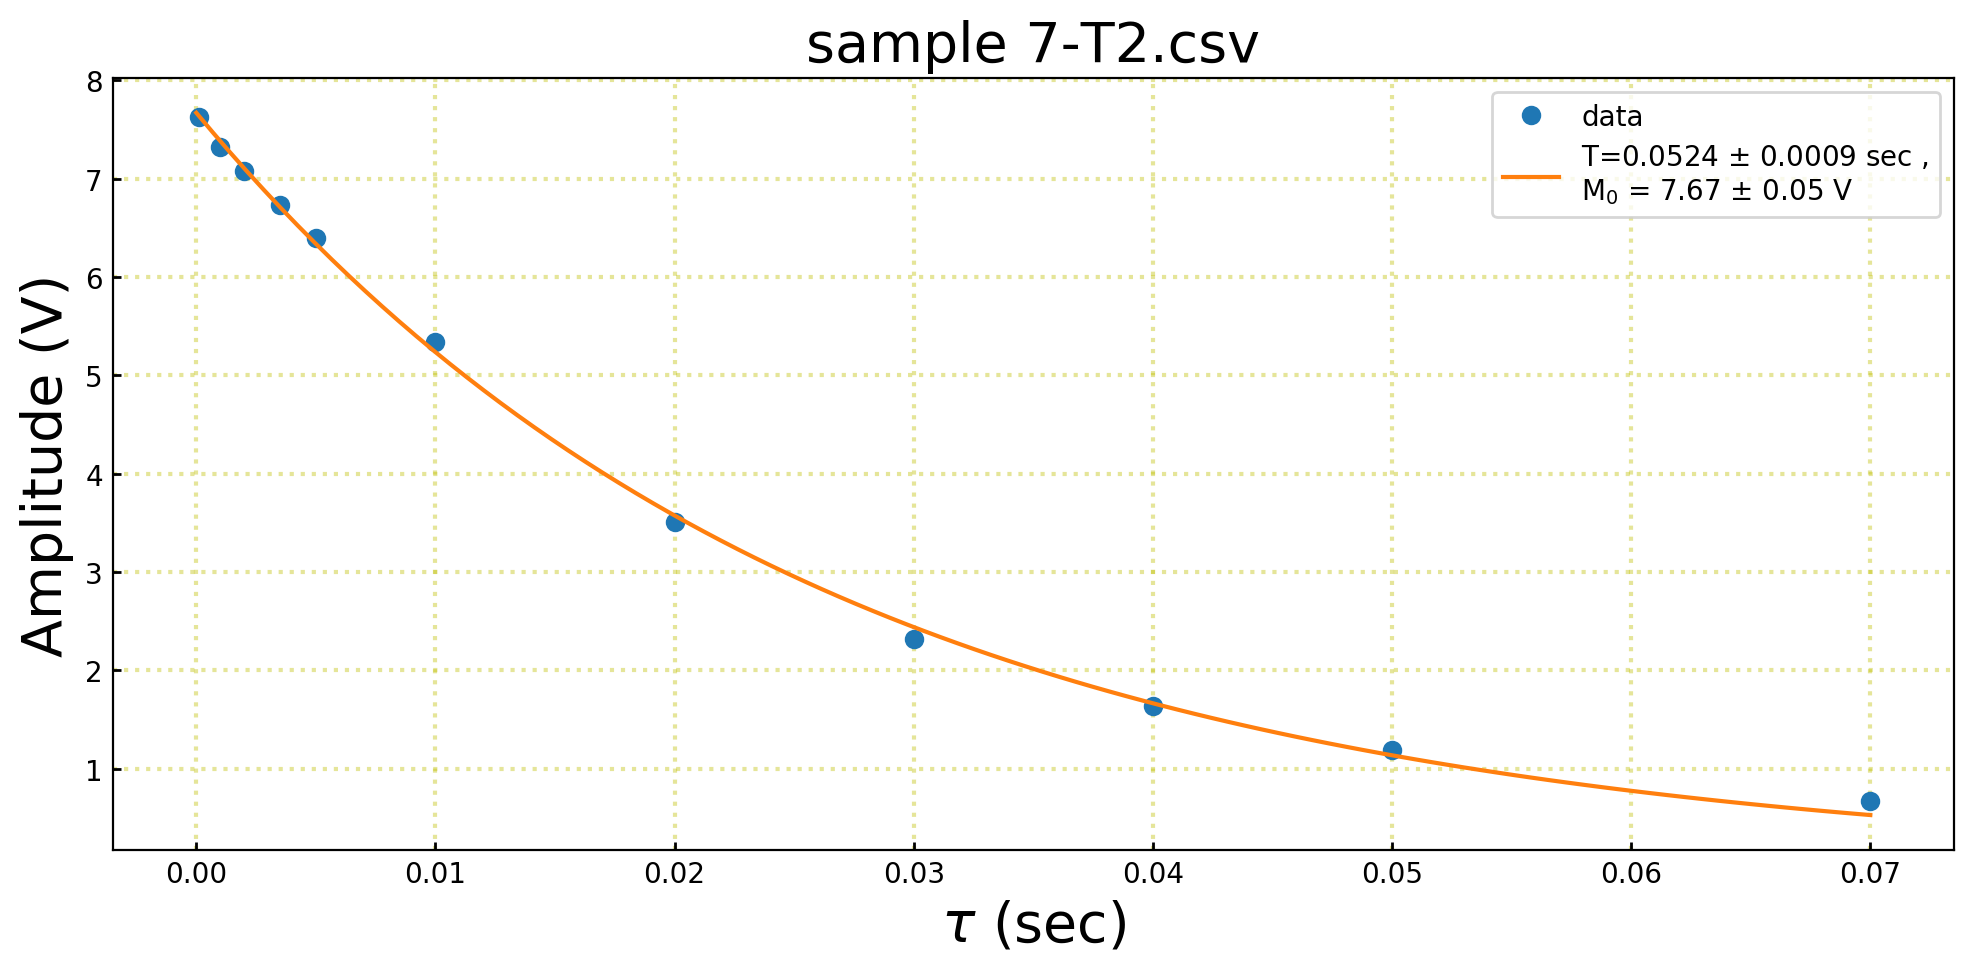

OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [0.02857352 8.04324247]
8


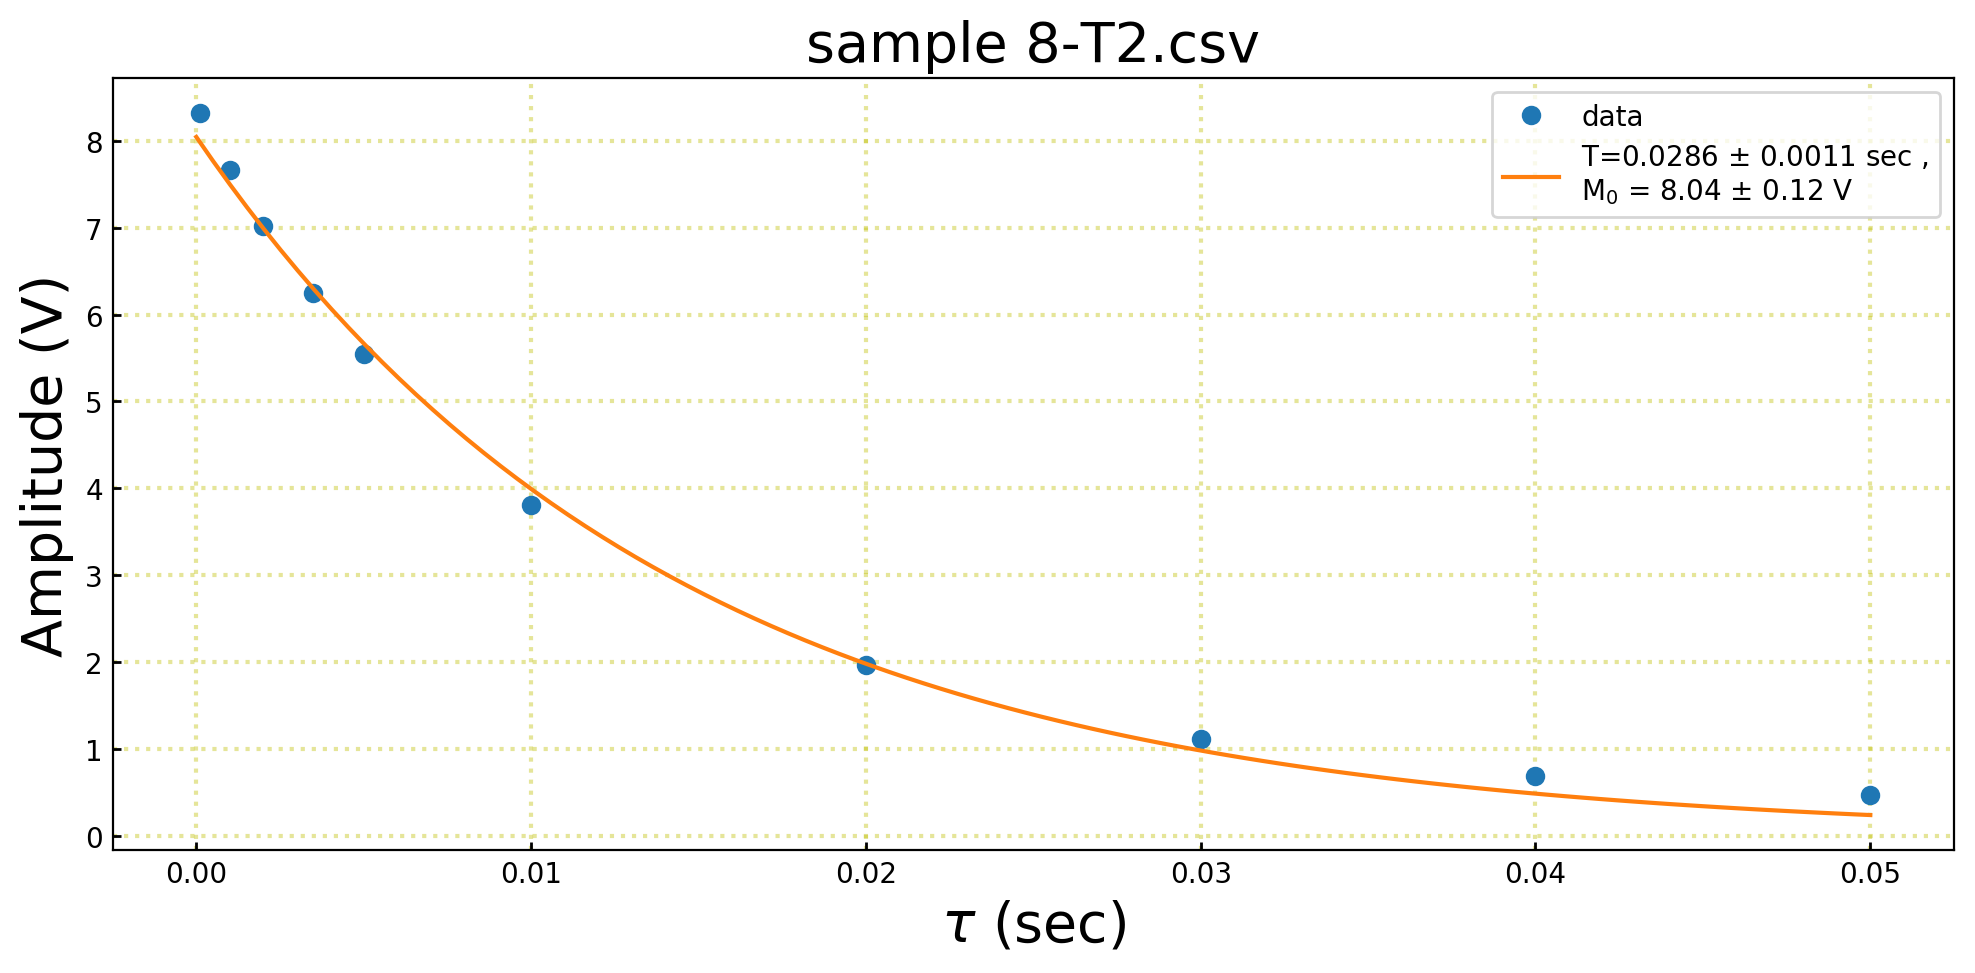

In [33]:
for i in T2s:
    plotExp(i, T2ss)
    plot.save(dirToSave='/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/images/T2ss_2')

In [34]:
T2s_table = T2ss[:8]
T2s_table = T2s_table.sort_values('sample')
T2s_table['sample'] = T2s_table['sample'].astype('int')
T2s_table

,sample,T$_2$,T$_{error}$,M$_0$,M$_{error}$
0,1,0.101249,0.001884,8.157896,0.061298
1,2,0.163381,0.013153,3.745373,0.114968
2,3,0.191858,0.004507,4.714964,0.035741
3,4,0.155172,0.007131,6.654900,0.102371
4,5,0.138796,0.010215,4.625324,0.211906
5,6,0.013996,0.000422,4.073979,0.072596
6,7,0.052417,0.000935,7.668868,0.052224
7,8,0.028574,0.001136,8.043242,0.124356


In [35]:
T2s_table[T2s_table.columns[1]] = np.round(T2s_table[T2s_table.columns[1]], 3)
T2s_table[T2s_table.columns[2]] = np.round(T2s_table[T2s_table.columns[2]], 3)
T2s_table[T2s_table.columns[3]] = np.round(T2s_table[T2s_table.columns[3]], 2)
T2s_table[T2s_table.columns[4]] = np.round(T2s_table[T2s_table.columns[4]], 2)
T2s_table

,sample,T$_2$,T$_{error}$,M$_0$,M$_{error}$
0,1,0.101,0.002,8.16,0.06
1,2,0.163,0.013,3.75,0.11
2,3,0.192,0.005,4.71,0.04
3,4,0.155,0.007,6.65,0.10
4,5,0.139,0.010,4.63,0.21
5,6,0.014,0.000,4.07,0.07
6,7,0.052,0.001,7.67,0.05
7,8,0.029,0.001,8.04,0.12


In [36]:
print(T2s_table.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  sample &  T\$\_2\$ &  T\$\_\{error\}\$ &  M\$\_0\$ &  M\$\_\{error\}\$ \\
\midrule
0 &       1 &  0.101 &        0.002 &   8.16 &         0.06 \\
1 &       2 &  0.163 &        0.013 &   3.75 &         0.11 \\
2 &       3 &  0.192 &        0.005 &   4.71 &         0.04 \\
3 &       4 &  0.155 &        0.007 &   6.65 &         0.10 \\
4 &       5 &  0.139 &        0.010 &   4.63 &         0.21 \\
5 &       6 &  0.014 &        0.000 &   4.07 &         0.07 \\
6 &       7 &  0.052 &        0.001 &   7.67 &         0.05 \\
7 &       8 &  0.029 &        0.001 &   8.04 &         0.12 \\
\bottomrule
\end{tabular}



# Now, FIDs

In [37]:
folderFids = '/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/FIDs/'
sampleFids = list(filter(lambda x: 'sample' in x and len(x)<=len('sampleN'), os.listdir(folderFids)))
curDir = os.chdir(folderFids + sampleFids[1])

In [38]:
folderFids + sampleFids[0] +'/' + 'sample2_08.csv'

'/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/FIDs/sample2/sample2_08.csv'

In [39]:
FIDs = pd.DataFrame(columns=['sample',r'T$_1$',r'T$_{error}$', r'M$_0$', r'M$_{error}$', r'M$_{ext}$', r'M$_{ext}^{error}$'])

In [40]:
TYPE = np.dtype([('Time', np.dtype('float')), ('ch1', np.dtype('float')), ('ch2', np.dtype('float'))])
def readCsvOsc(file):
    a = pd.read_csv(file,skiprows=1, dtype=TYPE)
    return np.array(a[a.columns[0]])[1:], np.array(a[a.columns[1]])[1:], np.array(a[a.columns[2]])[1:]

In [41]:
def plotExpOscill(expcsv):
    times, chA, chB = readCsvOsc(expcsv)
    guess = [6, 4, 1]
    bounds=([-10,-10, -10], [10, 10, 10])
#     peaks=detect_peaks.detect_peaks(chA, mph=, mpd=100)
    peaks = np.where(chA==max(chA))[0]
    print(peaks)
    plot.plot(times, chA, r'$\tau$',
          'Amplitude', 'sec', 'V', title=(expcsv.split('/')[-1]).split('_')[0], line='.')
    print(int((expcsv.split('/')[-1]).split('_')[0][-1]))
    popt, pcov = optimize.curve_fit(funcAlomstExp, times[peaks[0]:], 
                          chA[peaks[0]:], p0=guess, bounds=bounds)
    perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
    print ("OPTIMIZED PARAMETERS: cureveN[U0, Eg, C]", popt)

    FIDs.loc[FIDs.shape[0]] = [int((expcsv.split('/')[-1]).split('_')[0][-1]), 
                   popt[0],perr[0], popt[1], perr[1], popt[2], perr[2]]      
    t = np.linspace(0, times[-1], 100)
    plt.plot(t, funcAlomstExp(t, *popt),'g', linewidth=4)
    plt.legend(['data', f'T$_2$ = {round(popt[0], 3)} $\pm$ {round(perr[0],3)} sec\
    \nM={round(popt[1], 3)} $\pm$ {round(perr[1],3)} V\n' + r'M$_{ext}$' + f'= {round(popt[2],3)} $\pm$ {round(perr[2],3)} V'])

In [42]:
fidsFolder = '/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/images/FIDs'

[39124]
2
OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [1.98723285 5.07131028 0.29579803]


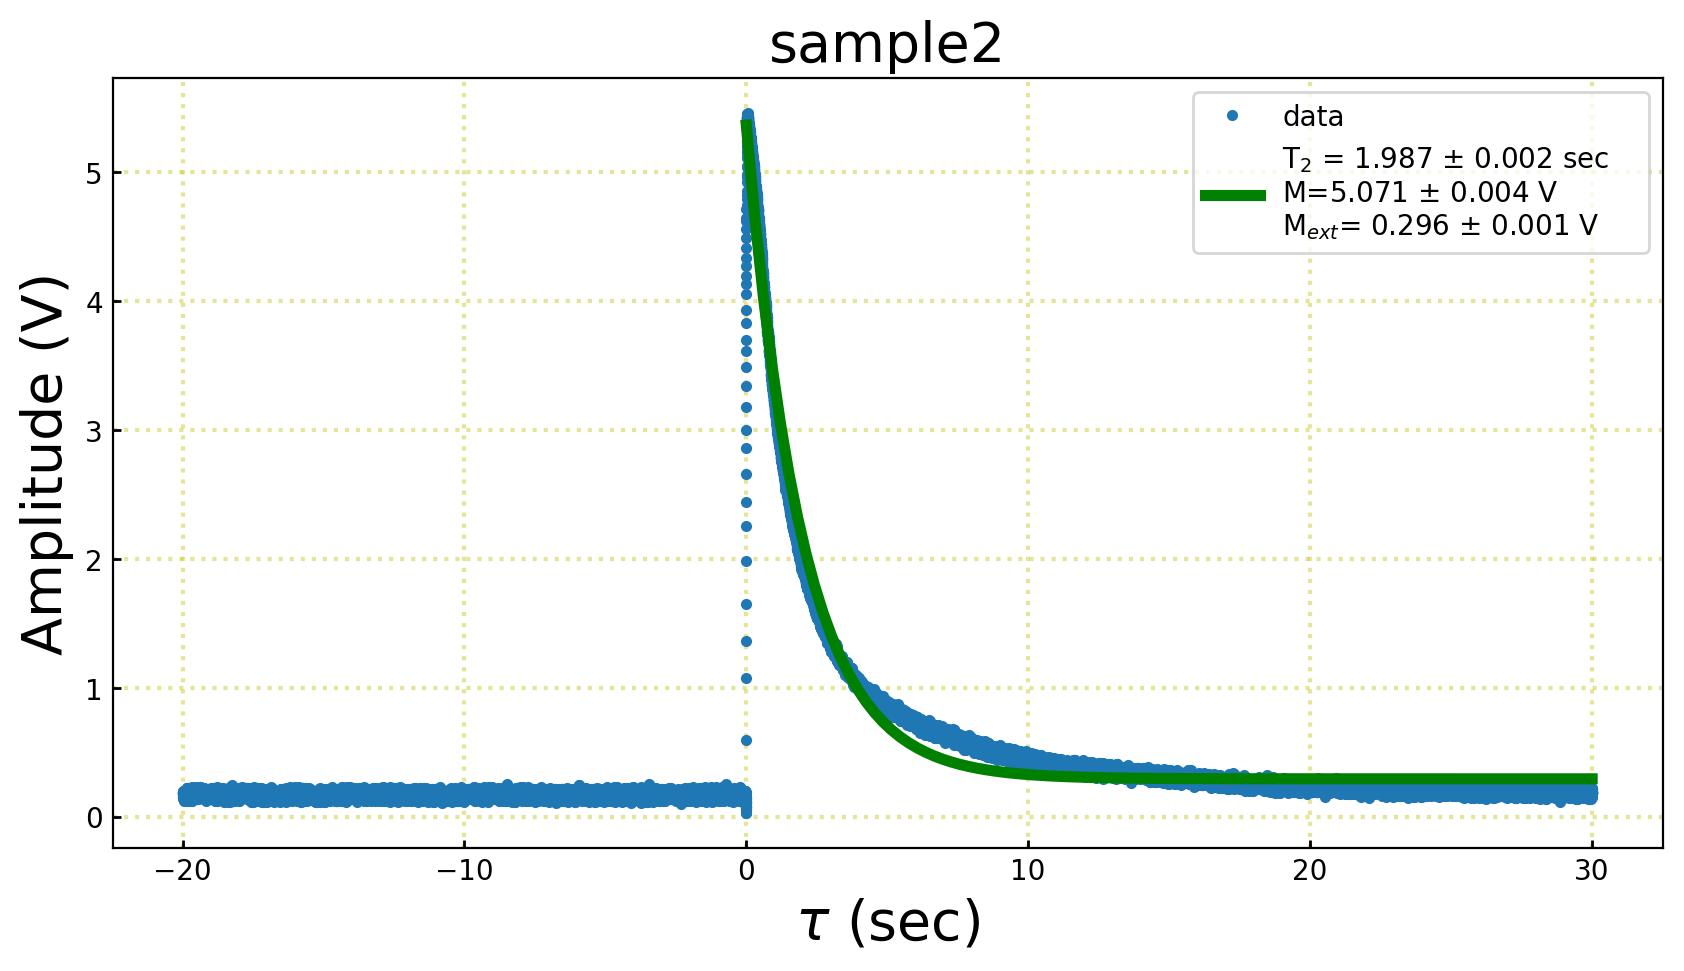

In [43]:
plotExpOscill(folderFids + sampleFids[0] +'/' + 'sample2_08.csv')
plot.save(dirToSave=fidsFolder)

/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/FIDs/sample8/sample8_05.csv
[43532]
8
OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [2.27480801 9.16653384 0.21686419]


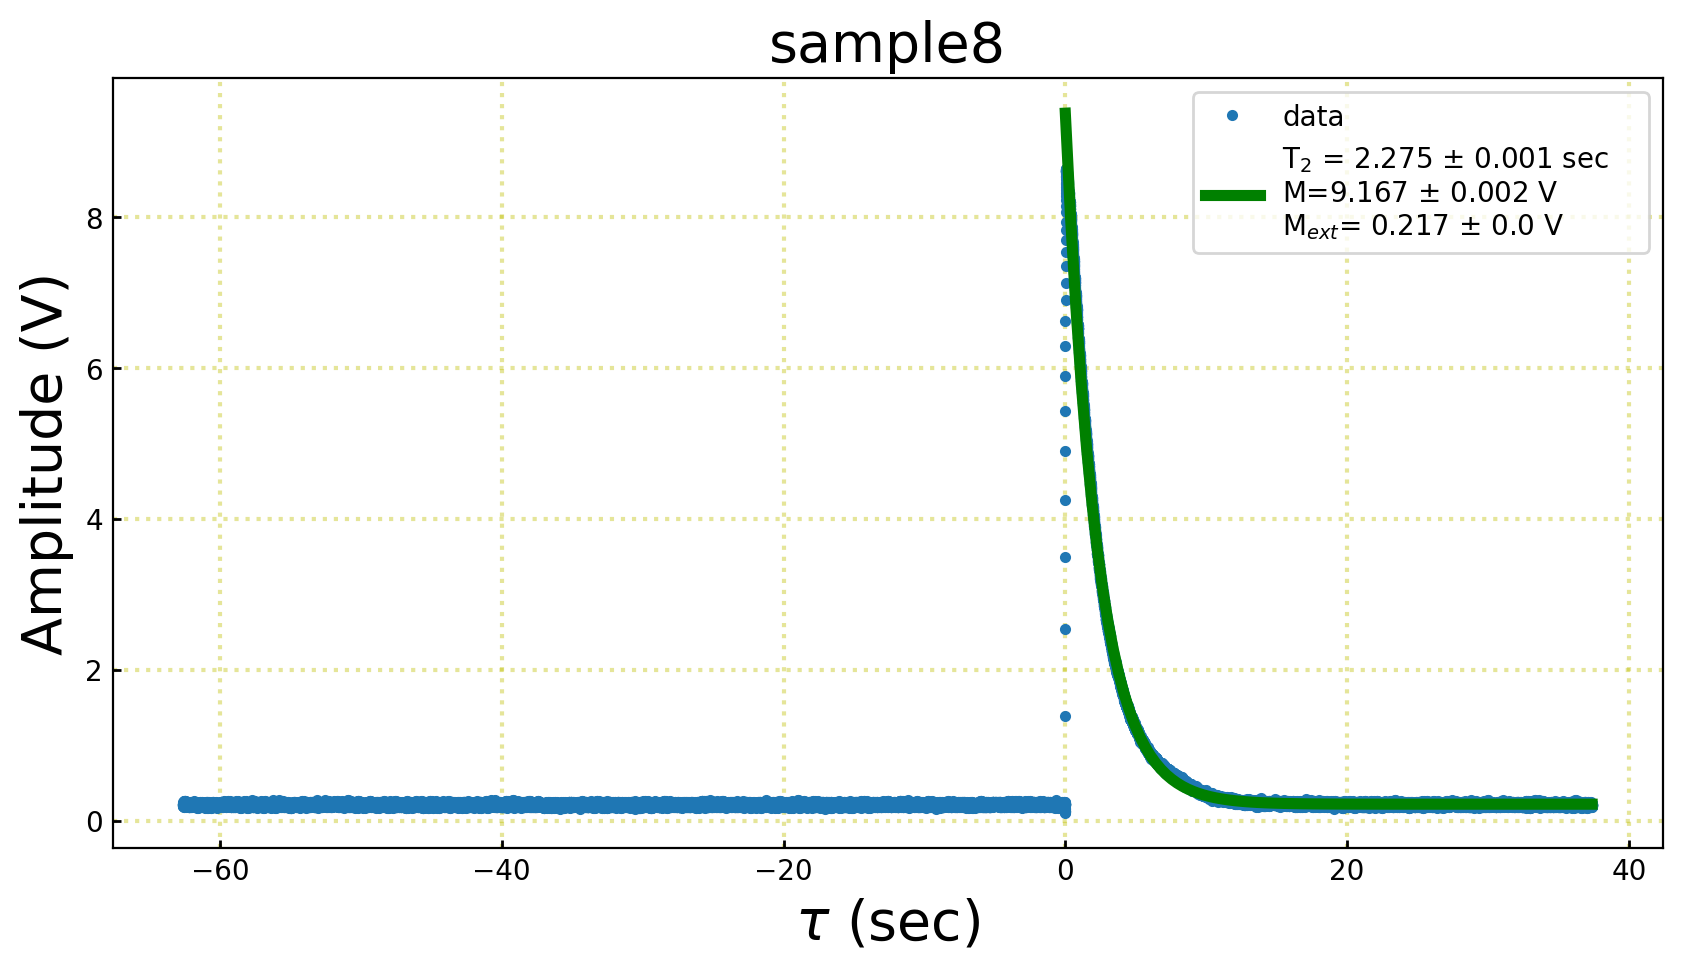

/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/FIDs/sample1/sample1_09.csv
[19595 19610]
1
OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [2.9554514  6.24318969 0.18411953]


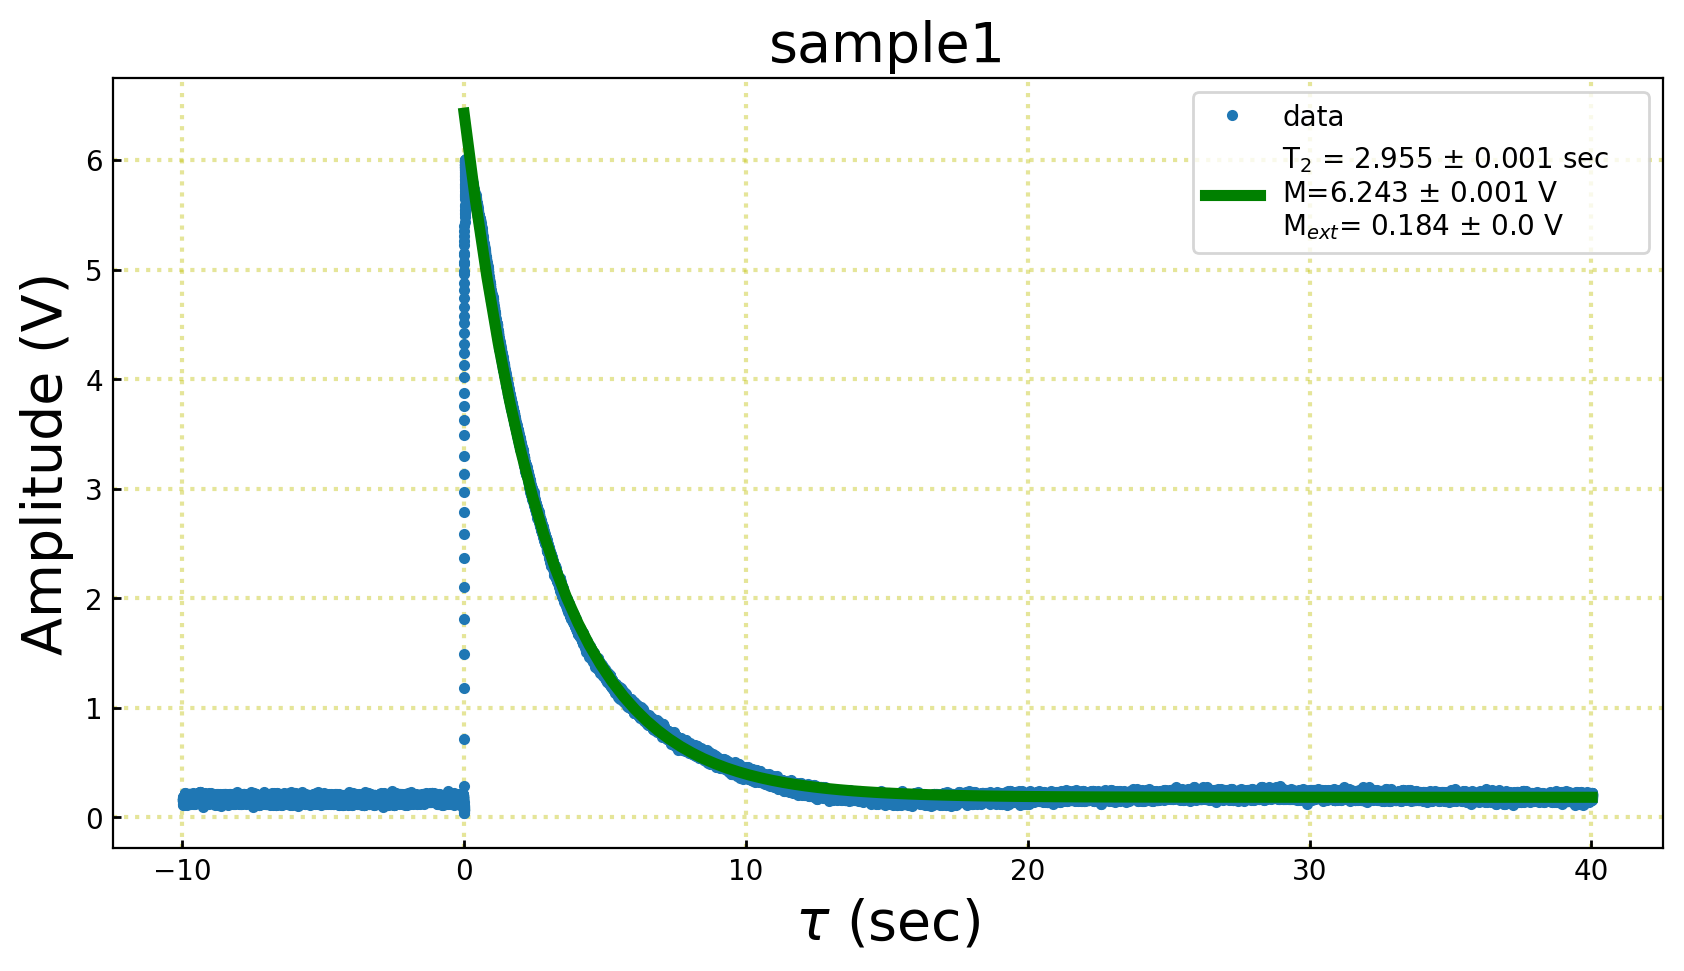

/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/FIDs/sample6/sampe6_0.csv
[65247]
6
OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [0.31710165 5.34004734 0.35494181]


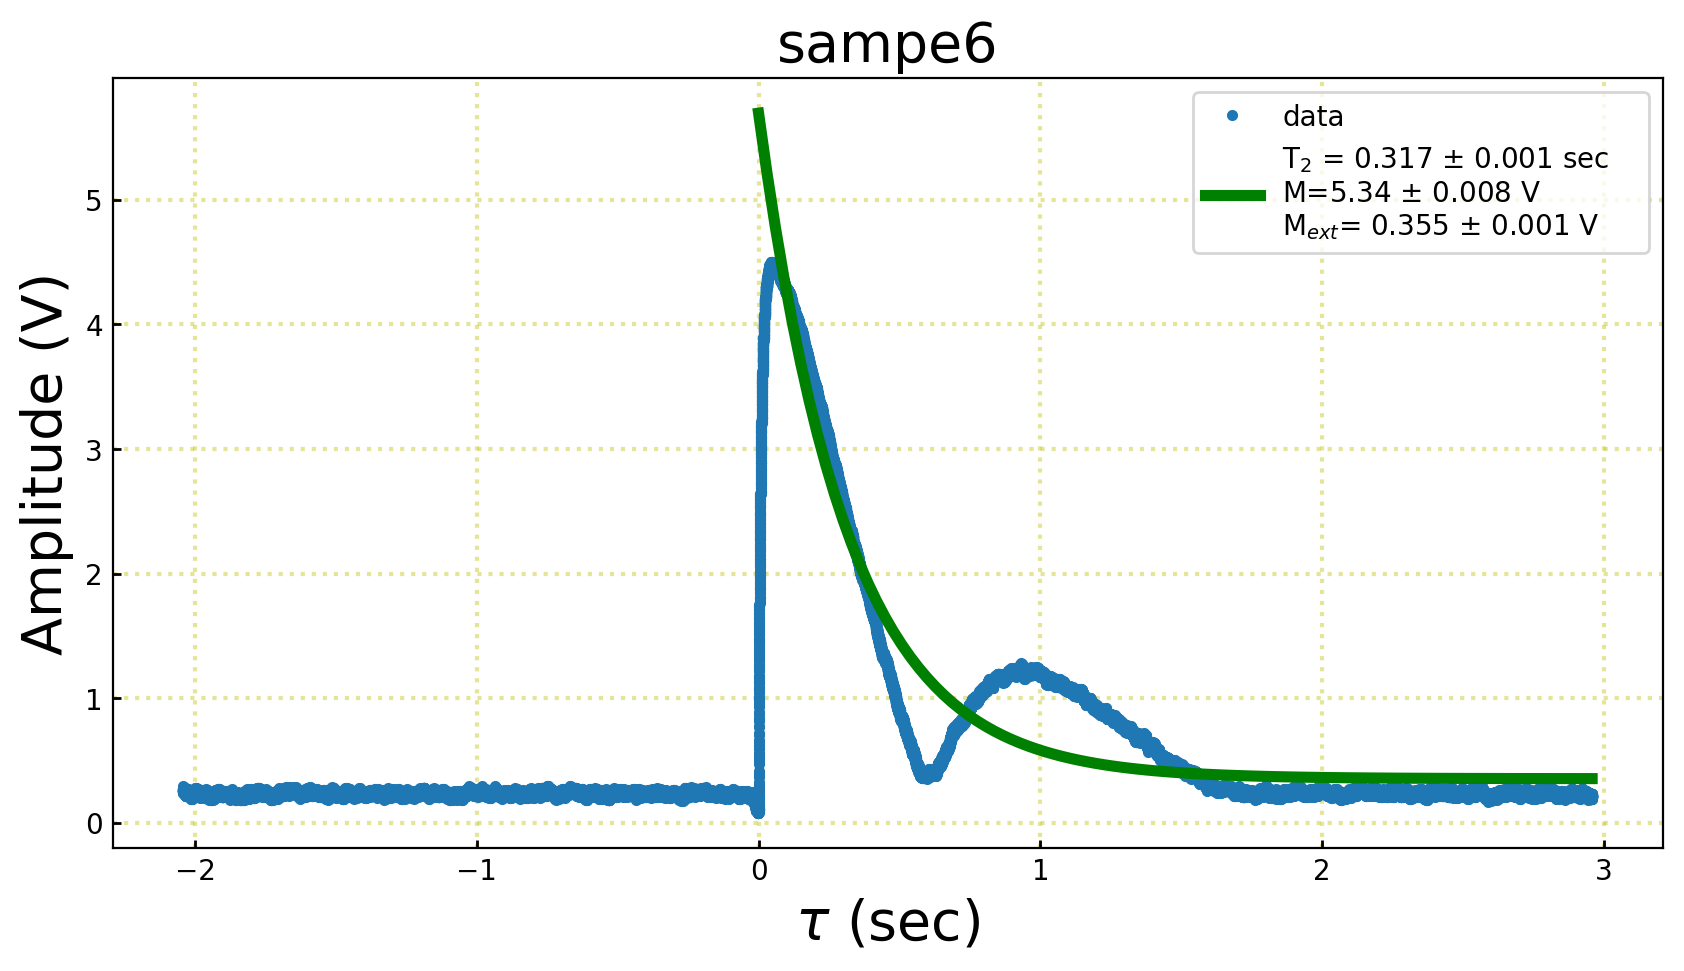

/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/FIDs/sample7/sample7_23.csv
[19652]
7
OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [2.78373208 7.5899742  0.25068575]


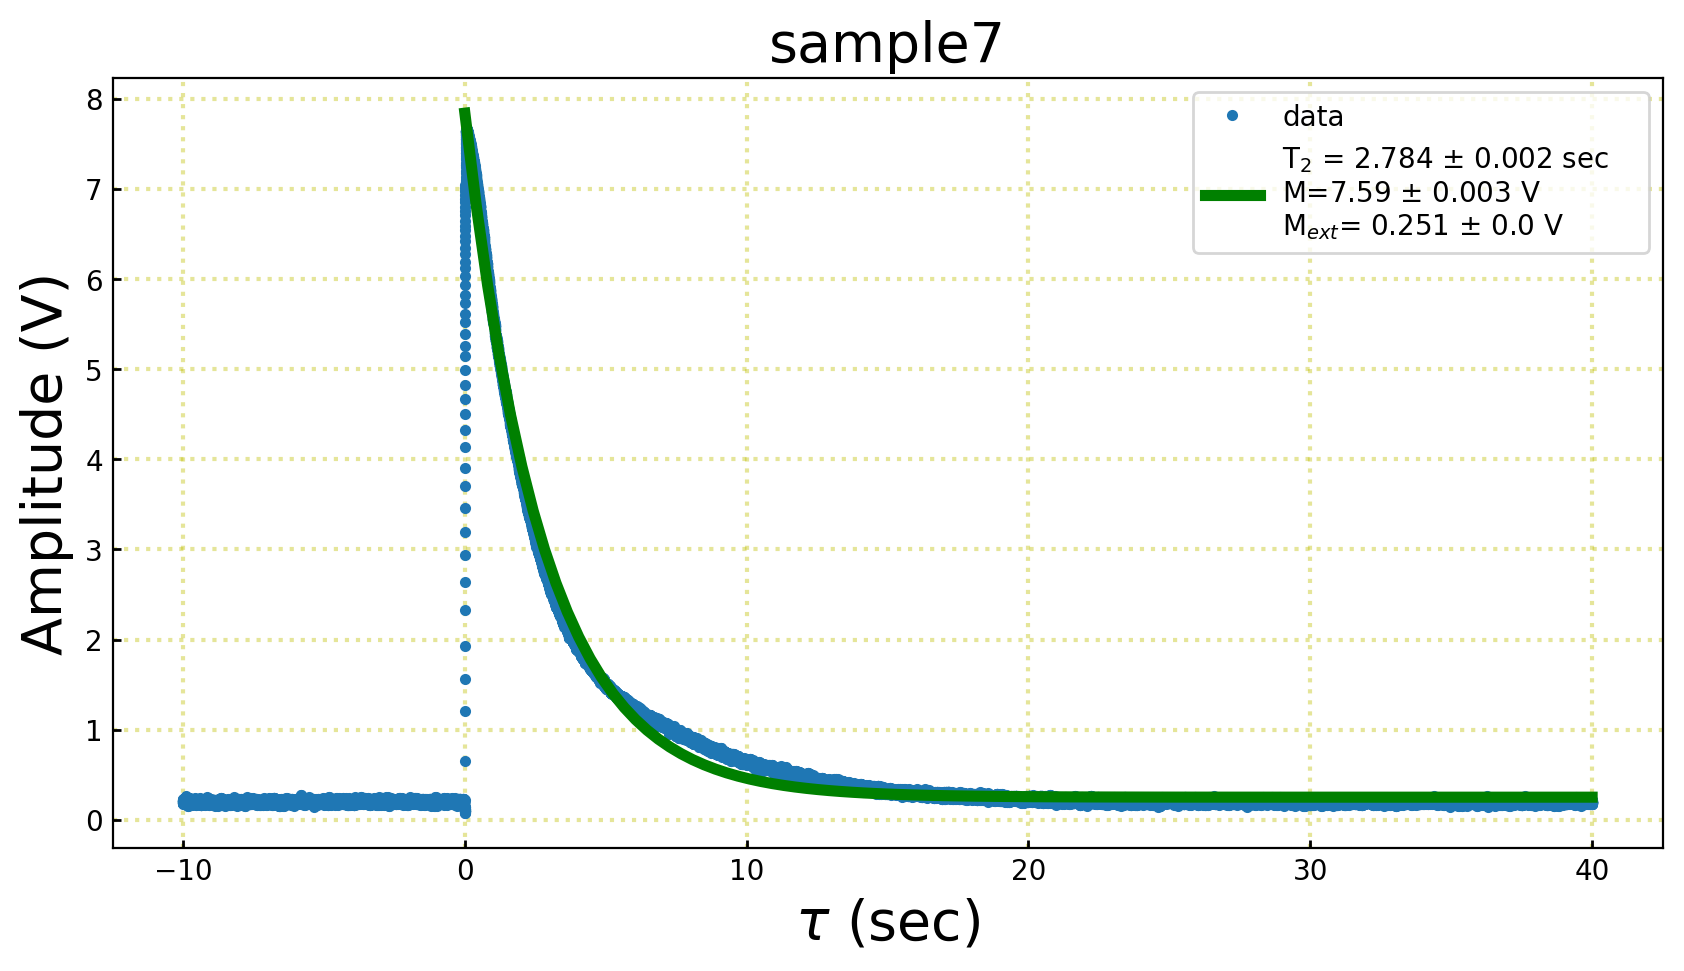

/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/FIDs/sample9/sample6_14.csv
[27230 27233]
6
OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [2.32642923 2.62929211 0.22750204]


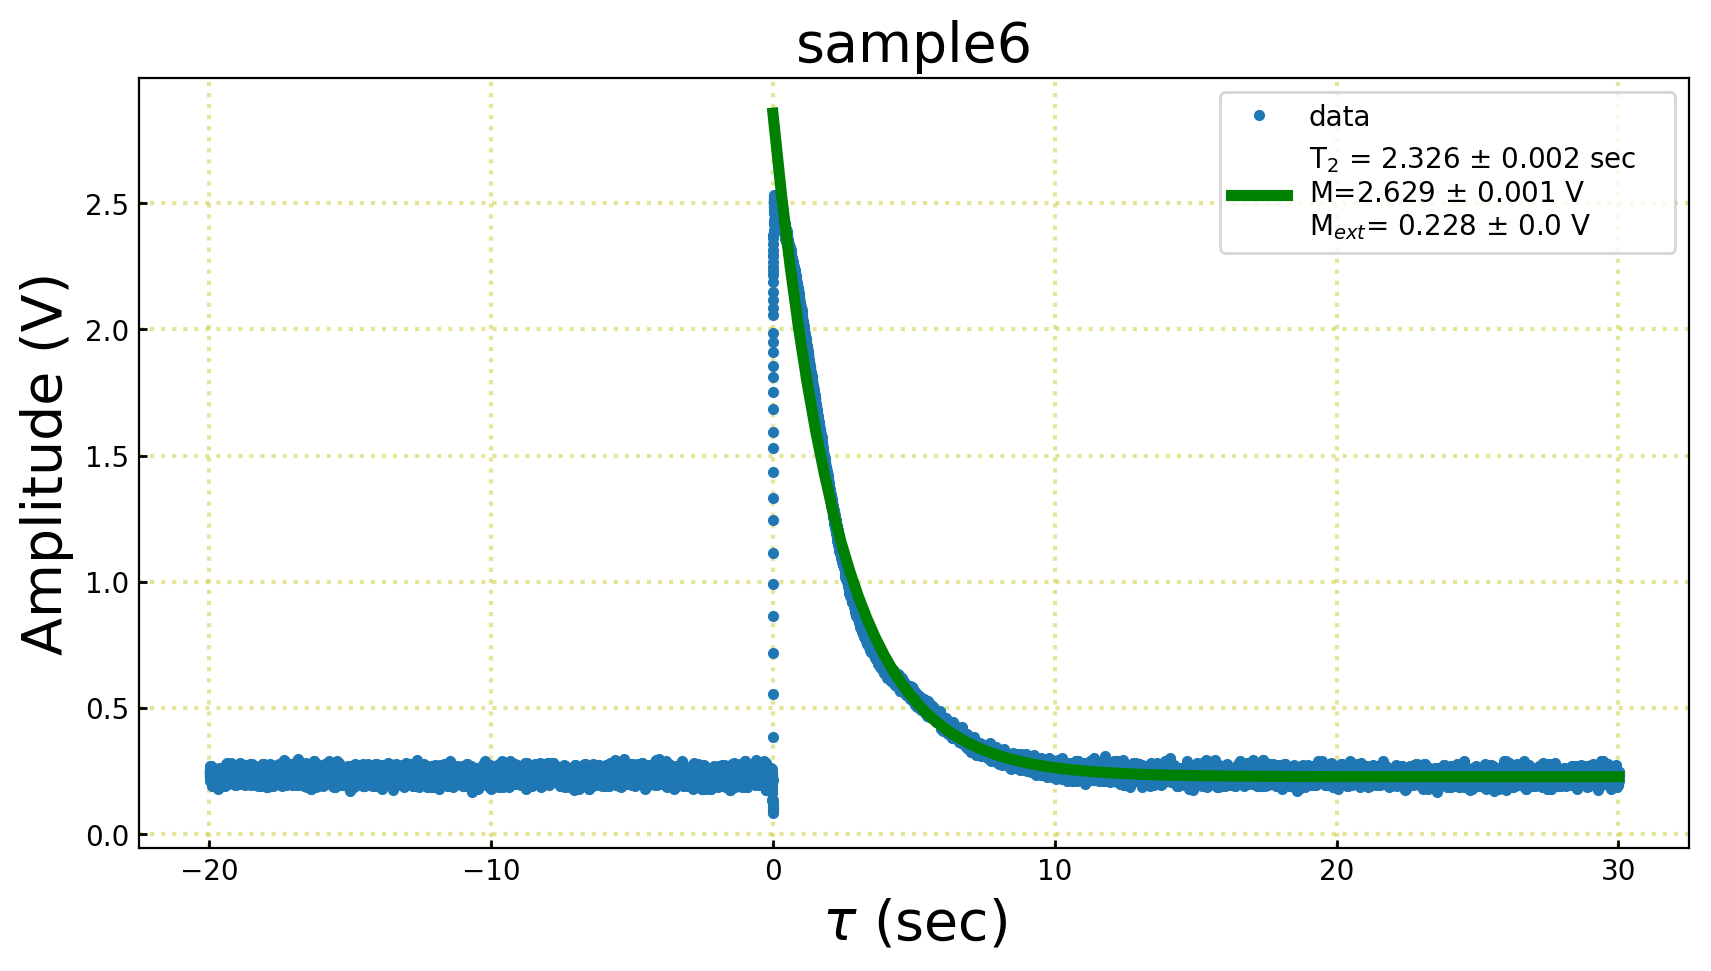

In [44]:
for i in sampleFids[1:]:
    curDir = os.chdir(folderFids + i)
    sample = os.listdir(folderFids + i)[-1]
    print(folderFids + i+'/' + sample)
    plotExpOscill(folderFids + i+'/' + sample)
    plot.save(dirToSave=fidsFolder)

In [45]:
FIDs = FIDs.sort_values('sample')

In [46]:
FIDs['sample'] = FIDs['sample'].astype('int')

In [47]:
FIDs.columns

Index(['sample', 'T$_1$', 'T$_{error}$', 'M$_0$', 'M$_{error}$', 'M$_{ext}$',
       'M$_{ext}^{error}$'],
      dtype='object')

In [48]:
FIDs

,sample,T$_1$,T$_{error}$,M$_0$,M$_{error}$,M$_{ext}$,M$_{ext}^{error}$
2,1,2.955451,0.000733,6.243190,0.001015,0.184120,0.000158
0,2,1.987233,0.002226,5.071310,0.003780,0.295798,0.000543
3,6,0.317102,0.000704,5.340047,0.008267,0.354942,0.001354
5,6,2.326429,0.001767,2.629292,0.001306,0.227502,0.000209
4,7,2.783732,0.001604,7.589974,0.002894,0.250686,0.000431
1,8,2.274808,0.000781,9.166534,0.002131,0.216864,0.000284


In [49]:
FIDs[FIDs.columns[1]] = np.round(FIDs[FIDs.columns[1]], 3)
FIDs[FIDs.columns[2]] = np.round(FIDs[FIDs.columns[2]], 3)
FIDs[FIDs.columns[3]] = np.round(FIDs[FIDs.columns[3]], 2)
FIDs[FIDs.columns[4]] = np.round(FIDs[FIDs.columns[4]], 4)
FIDs[FIDs.columns[5]] = np.round(FIDs[FIDs.columns[5]], 2)
FIDs[FIDs.columns[6]] = np.round(FIDs[FIDs.columns[6]], 4)

In [50]:
FIDs=FIDs.drop(3)

In [51]:
FIDs

,sample,T$_1$,T$_{error}$,M$_0$,M$_{error}$,M$_{ext}$,M$_{ext}^{error}$
2,1,2.955,0.001,6.24,0.0010,0.18,0.0002
0,2,1.987,0.002,5.07,0.0038,0.30,0.0005
5,6,2.326,0.002,2.63,0.0013,0.23,0.0002
4,7,2.784,0.002,7.59,0.0029,0.25,0.0004
1,8,2.275,0.001,9.17,0.0021,0.22,0.0003


In [52]:
print(FIDs.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  sample &  T\$\_1\$ &  T\$\_\{error\}\$ &  M\$\_0\$ &  M\$\_\{error\}\$ &  M\$\_\{ext\}\$ &  M\$\_\{ext\}\textasciicircum\{error\}\$ \\
\midrule
2 &       1 &  2.955 &        0.001 &   6.24 &       0.0010 &       0.18 &             0.0002 \\
0 &       2 &  1.987 &        0.002 &   5.07 &       0.0038 &       0.30 &             0.0005 \\
5 &       6 &  2.326 &        0.002 &   2.63 &       0.0013 &       0.23 &             0.0002 \\
4 &       7 &  2.784 &        0.002 &   7.59 &       0.0029 &       0.25 &             0.0004 \\
1 &       8 &  2.275 &        0.001 &   9.17 &       0.0021 &       0.22 &             0.0003 \\
\bottomrule
\end{tabular}



# Multipulsing

In [53]:
os.chdir('/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/oscilloscope_data')
toplot = os.listdir()
del toplot[2]
os.chdir(toplot[0])
times, chA, chB = readCsvOsc(os.listdir()[0])

In [54]:
os.listdir()[0]

'multi-pulse_CP_08.csv'

NameError: name 'detect_peaks' is not defined

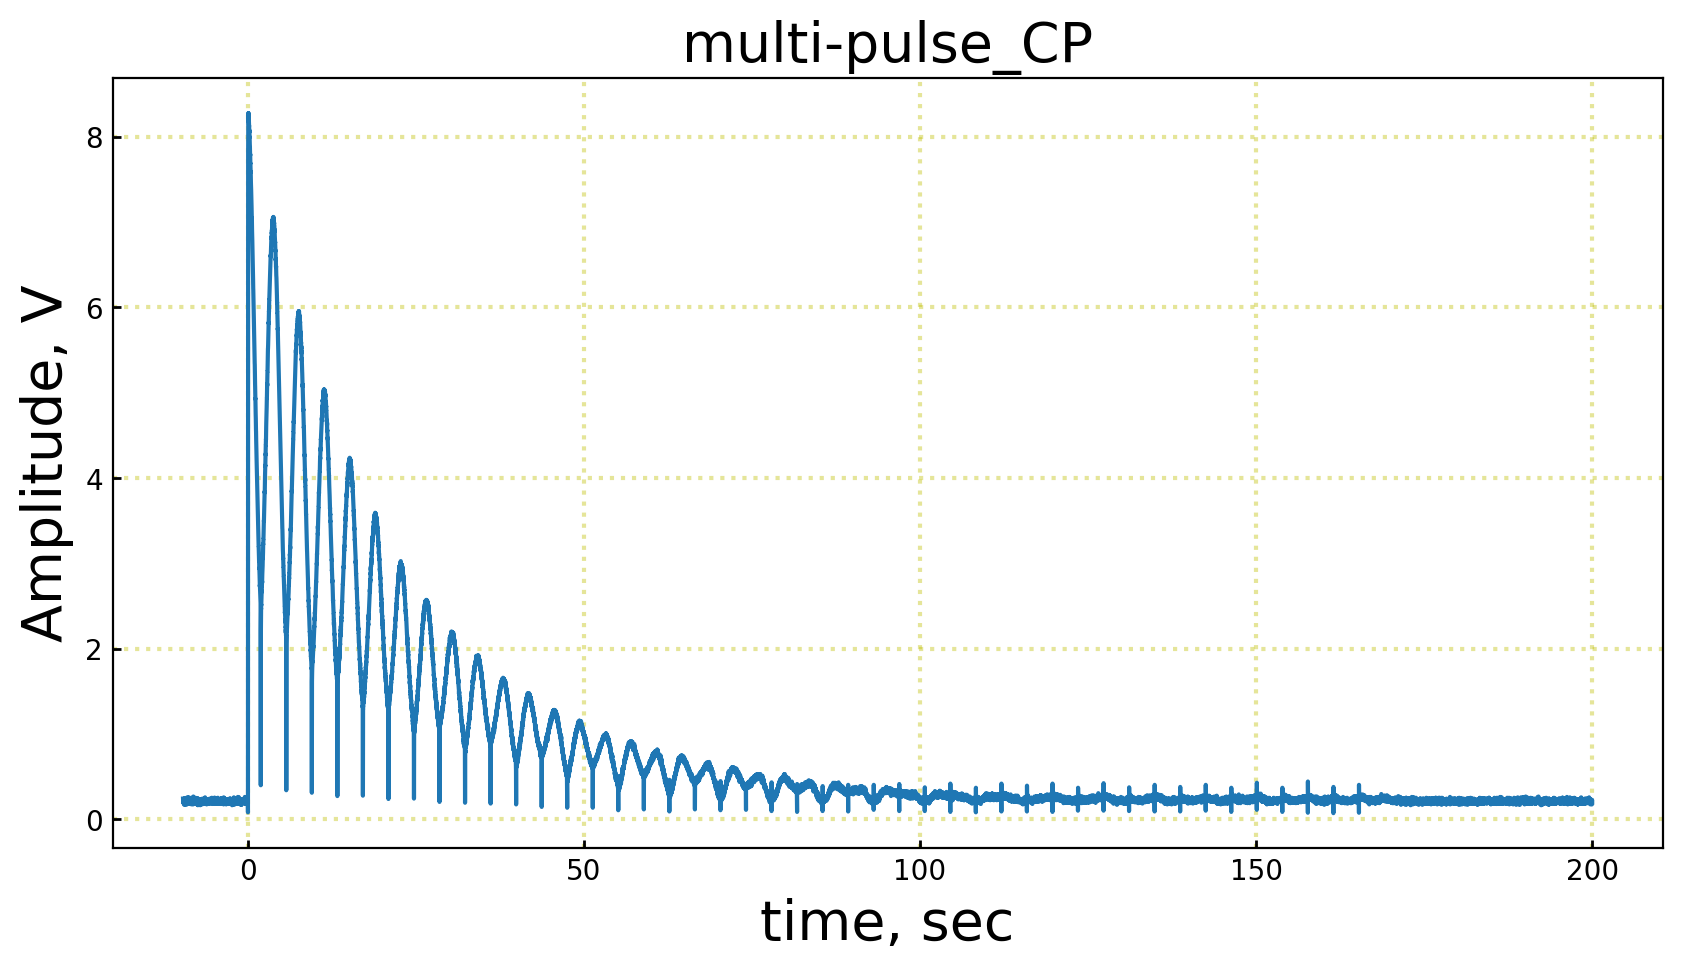

In [55]:
chA=chA[times< 200]
times=times[times < 200]
plot.plot(xData=times, yData=chA, xLabel='time, sec', yLabel='Amplitude, V', line='-', title=toplot[0])
guess = [60, 40]
bounds=([-1e4,-1e4], [1e5, 1e5])
peaks=detect_peaks.detect_peaks(chA, mph=0.1, mpd=1000)
peak = np.where(chA==max(chA))[0][0]
peaks=peaks[peaks >= peak]
popt, pcov = optimize.curve_fit(funcExp, times[peaks], 
                          chA[peaks], p0=guess, bounds=bounds)
perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
print ("OPTIMIZED PARAMETERS: cureveN[U0, Eg, C]", popt)
t = np.linspace(0, times[-1], 100)
# plt.plot(times[peaks], chA[peaks])
plt.plot(t, funcExp(t, *popt), 'g')
plt.legend(['data', f'T$_2$ = {round(popt[0], 1)} $\pm$ {round(perr[0],1)} sec\
\nM={round(popt[1], 1)} $\pm$ {round(perr[1],1)} V\n'])
plot.save(dirToSave='/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/images')

In [ ]:
os.chdir('/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/oscilloscope_data')
toplot = os.listdir()
del toplot[2]
os.chdir(toplot[2])
times, chA, chB = readCsvOsc(os.listdir()[0])

In [ ]:
os.listdir()[0]

In [ ]:
np.argmax(times>50)

In [ ]:
times[peaks]

In [ ]:
chA=chA[times< 200]
times=times[times < 200]
plot.plot(xData=times, yData=chA, xLabel='time, sec', yLabel='Amplitude, V', line='-', title=toplot[2])
guess = [60, 40]
bounds=([-1e4,-1e4], [1e5, 1e5])
peaks=detect_peaks.detect_peaks(chA, mph=0.1, mpd=1000)
peak = np.where(chA==max(chA))[0][0]
peaks=peaks[peaks >= peak]
peaksTimes= times[peaks]
peaksChA = chA[peaks]

# aa=-18
# peaksTimes = peaksTimes[aa:]
# peaksChA = peaksChA[aa:]
popt, pcov = optimize.curve_fit(funcExp, peaksTimes, 
                          peaksChA, p0=guess, bounds=bounds)
perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
print ("OPTIMIZED PARAMETERS: cureveN[U0, Eg, C]", popt)
t = np.linspace(0, times[-1], 100)
# plt.plot(peaksTimes, peaksChA)
plt.plot(t, funcExp(t, *popt), 'g')
plt.legend(['data', f'T$_2$ = {round(popt[0], 1)} $\pm$ {round(perr[0],1)} sec\
\nM={round(popt[1], 1)} $\pm$ {round(perr[1],1)} V\n'])
plot.save(dirToSave='/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/images')

# Fourier transform

In [ ]:
os.chdir('/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/NMR/oscilloscope_data')
toplot = os.listdir()
# del toplot[2]
os.chdir(toplot[1])
freq, chA, chB = readCsvOsc(os.listdir()[0])

In [ ]:
plot.plot(xData=freq, yData=chB, xLabel='frequency, MHz', yLabel='Amplitude, dBu', line='-', title='FFT')
peak = np.where(chB == max(chB))[0][0]
plt.plot(freq[peak], chB[peak], 'o')
plot.save()